# Hyperparameters

## Visual Python Upgrade
NOTE: 
- Refresh your web browser to start a new version.
- Save VP Note before refreshing the page.

**Libraries**

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")

import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams.update({'figure.figsize': (10, 10), 'figure.dpi': 50, 'font.size': 10})
plt.style.use('fivethirtyeight')
#plt.rcParams['font.size'] = 10
clock_0 =time.time()

In [2]:
print( "Pandas", pd.__version__)
print("Numpy", np.__version__)
#print(plt.__version__)
print("Seaborn",sns.__version__)

Pandas 1.3.5
Numpy 1.21.2
Seaborn 0.11.2


*    Constants and variables

In [3]:
clock_0 =time.time()
TEST_SIZE = 0.3
RANDOM_STATE = 42
modelado = [] # resultados

## Get data

In [5]:
#tarjeta = pd.read_csv("~/Trabajo_tfm/datos_csv/tarjeta_datos0.csv", index_col='Unnamed: 0') # iter 0
tarjeta = pd.read_csv("~/Trabajo_tfm/datos_csv/tarjeta_datos_3.csv")
                      #index_col='Unnamed: 0') # iter 0
tarjeta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7077 entries, 0 to 7076
Data columns (total 72 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fecha                 7077 non-null   object 
 1   provincia             7077 non-null   object 
 2   v_muy_cortos          7077 non-null   float64
 3   v_cortos              7077 non-null   float64
 4   v_medios              7077 non-null   float64
 5   v_largos              7077 non-null   float64
 6   v_muy_largos          7077 non-null   float64
 7   v_extra_largos        7077 non-null   float64
 8   v_noche               7077 non-null   float64
 9   v_madrugada           7077 non-null   float64
 10  v_mañana              7077 non-null   float64
 11  v_mediodia            7077 non-null   float64
 12  v_sobremesa           7077 non-null   float64
 13  v_tarde               7077 non-null   float64
 14  v_km_muy_cortos       7077 non-null   float64
 15  v_km_cortos          

In [5]:
#data = pd.get_dummies(tarjeta)
X = tarjeta.drop(columns=['num_casos']).select_dtypes(exclude=['object'])
Y = tarjeta[['num_casos']]

In [6]:
features = X.columns.tolist()
labels = Y.num_casos

In [7]:
lista_variables = list(X.columns)
lista_variables

['v_muy_cortos',
 'v_cortos',
 'v_medios',
 'v_largos',
 'v_noche',
 'v_madrugada',
 'v_mañana',
 'v_mediodia',
 'v_sobremesa',
 'v_tarde',
 'v_km_muy_cortos',
 'v_km_cortos',
 'v_km_medios',
 'v_km_largos',
 'v_km_noche',
 'v_km_madrugada',
 'v_km_mañana',
 'v_km_mediodia',
 'v_km_sobremesa',
 'v_km_tarde',
 'vext_muy_cortos',
 'vext_cortos',
 'vext_medios',
 'vext_largos',
 'vext_muy_largos',
 'vext_extra_largos',
 'vext_noche',
 'vext_madrugada',
 'vext_mañana',
 'vext_mediodia',
 'vext_sobremesa',
 'vext_tarde',
 'vext_km_muy_cortos',
 'vext_km_cortos',
 'vext_km_medios',
 'vext_km_largos',
 'vext_km_muy_largos',
 'vext_km_extra_largos',
 'vext_km_noche',
 'vext_km_madrugada',
 'vext_km_mañana',
 'vext_km_mediodia',
 'vext_km_sobremesa',
 'vext_km_tarde',
 'cero_viajes',
 'un_viaje',
 'dos_viajes',
 'mas_de_dos_viajes',
 'altitud',
 'velmedia',
 'tmin',
 'tmed',
 'tmax',
 'presMin',
 'presMax',
 'sol',
 'prec',
 'ha',
 'psat',
 'hr',
 'vol_min',
 'vol_max',
 'delta_V',
 'delta_P',


## Normalización.

In [8]:
from sklearn import preprocessing # RobustScaler() # StandardScaler() MinMaxScaler
scaler = preprocessing.StandardScaler(with_mean=True, with_std=True)
X_norm = scaler.fit_transform(X)

In [9]:
X_norm

array([[ 0.35063176,  0.55292618, -0.13585345, ...,  0.30032401,
        -0.20018605,  0.48710119],
       [-0.47358706, -0.42280983, -0.26369486, ..., -0.60139513,
        -0.70008609, -0.3451965 ],
       [-0.33906846, -0.4516808 , -0.10383793, ...,  0.50526017,
        -0.91743393, -0.3767292 ],
       ...,
       [ 0.42827745,  0.06583962, -0.42502569, ..., -0.3144845 ,
        -0.41753389,  1.00202217],
       [-0.78667529, -0.85643185, -0.098973  , ..., -0.51942066,
        -0.30885997, -0.74191994],
       [ 0.03321428,  0.01740263, -0.03689962, ...,  0.83315804,
        -0.24365562, -0.16452323]])

## Base model

### Liberias ML

In [10]:
#from sklearn.metrics import make_scorer
#from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.inspection import permutation_importance

import xgboost as xgb
print(xgb.__version__)

1.1.1


In [11]:
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, TimeSeriesSplit, StratifiedKFold

from sklearn.feature_selection import mutual_info_regression, SelectKBest, SelectPercentile

from feature_engine.selection import SmartCorrelatedSelection, DropCorrelatedFeatures
from feature_engine.selection import RecursiveFeatureAddition, RecursiveFeatureElimination, SelectByShuffling

### Funciones auxiliares

In [12]:
def modelo(atributos, labels, feat_eng="base",features = False, graficas= False):
    """ Function to test data (atributos and labels) with four models .
        Optionally (graficas) can show feature's importance an permutation importance.
    """
    num_feats = atributos.shape[1]
    
    X_train, X_test, y_train, y_test = train_test_split(
        atributos, labels, test_size = TEST_SIZE, random_state = RANDOM_STATE)
    
    reg1 = RandomForestRegressor(random_state=RANDOM_STATE)
    reg2 = xgb.XGBRegressor(random_state = RANDOM_STATE)
    reg3 = GradientBoostingRegressor(random_state = RANDOM_STATE)
    #####################################################################
    # 
    #####################################################################
    reg4 = AdaBoostRegressor(      
        RandomForestRegressor(random_state=RANDOM_STATE))
        #xgb.XGBRegressor(random_state = RANDOM_STATE), random_state = RANDOM_STATE)

    reg1.fit(X_train, y_train)
    reg2.fit(X_train, y_train)
    reg3.fit(X_train, y_train)
    reg4.fit(X_train, y_train)
    
    pred1 = reg1.predict(X_test)
    pred2 = reg2.predict(X_test)
    pred3 = reg3.predict(X_test)
    pred4 = reg4.predict(X_test)
    
    mae1 = mean_absolute_error(y_test, pred1)
    mae2 = mean_absolute_error(y_test, pred2)
    mae3 = mean_absolute_error(y_test, pred3)
    mae4 = mean_absolute_error(y_test, pred4)
    
    media_casos_reales = np.mean(y_test)
    mape1 = mae1/media_casos_reales*100
    mape2 = mae2/media_casos_reales*100
    mape3 = mae3/media_casos_reales*100
    mape4 = mae4/media_casos_reales*100

    mse1 = np.sqrt(mean_squared_error(y_test, pred1))
    mse2 = np.sqrt(mean_squared_error(y_test, pred2))
    mse3 = np.sqrt(mean_squared_error(y_test, pred3))
    mse4 = np.sqrt(mean_squared_error(y_test, pred4))

    r2_score1 = r2_score(y_test, pred1)
    r2_score2 = r2_score(y_test, pred2)
    r2_score3 = r2_score(y_test, pred3)
    r2_score4 = r2_score(y_test, pred4)

    r2_train_1 = reg1.score(X_train, y_train)
    r2_train_2 = reg2.score(X_train, y_train)
    r2_train_3 = reg3.score(X_train, y_train)
    r2_train_4 = reg4.score(X_train, y_train)
    
    modelado.append([feat_eng, 'RandomForest', #reg1.get_params(),
                     num_feats,  r2_score1, mse1, mae1,mape1])
    modelado.append([feat_eng, 'Xgboost',  #reg2.get_params(),
                     num_feats, r2_score2, mse2, mae2, mape2])
    modelado.append([feat_eng, 'GradBoost', #reg3.get_params(), 
                     num_feats, r2_score3, mse3, mae3, mape3])
    modelado.append([feat_eng,'Adaboost',  #reg4.get_params(), 
                     num_feats,  r2_score4, mse4, mae4, mape4])

    columnas = ['mae', 'mape', 'rmse', 'r2',  'train_r2']
    metricas_modelos = pd.DataFrame(
        {'metricas': columnas,
         'RandomForest': [mae1, mape1, mse1, r2_score1,  r2_train_1],
         'Xgboost': [mae2, mape2, mse2, r2_score2, r2_train_2],
         'GradBoost': [mae3, mape3,  mse3, r2_score3,  r2_train_3],
         'Adaboost': [mae4, mape4, mse4, r2_score4,  r2_train_4]})
 
    if graficas :
        
        importancias = pd.DataFrame(
            {
             'Attributes': features ,
             'RandomForest': reg1.feature_importances_,
             'Xgboost' : reg2.feature_importances_,
             'GradBoost': reg3.feature_importances_,
             'Adaboost' : reg4.feature_importances_ })
        
        result1 = permutation_importance(reg1, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE, n_jobs=2)
        result2 = permutation_importance(reg2, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE, n_jobs=2)
        result3 = permutation_importance(reg3, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE, n_jobs=2)
        result4 = permutation_importance(reg4, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE, n_jobs=2)

        permutaciones = [result1, result2, result3, result4]
        graficas_importancia(importancias, permutaciones, [pred1, pred2, pred3, pred4])
        
    return metricas_modelos

In [13]:
metricas = modelo(X_norm, labels)
metricas

,metricas,RandomForest,Xgboost,GradBoost,Adaboost
0,mae,102.664073,95.781174,137.781160,100.379802
1,mape,47.534222,44.347389,63.793692,46.476588
2,rmse,251.229093,220.594279,298.127211,221.972142
3,r2,0.818227,0.859855,0.744028,0.858099
4,train_r2,0.973800,0.997608,0.902733,0.996954


In [14]:
kfcv = KFold(n_splits = 5, shuffle = True, random_state=RANDOM_STATE) 
rkfcv = RepeatedKFold(n_splits = 5, n_repeats=2, random_state=RANDOM_STATE)
mae_scoring = { "mae" : make_scorer(mean_absolute_error)} #param_learning_rate

### XGBoost Selected features 

#### SelectKBest : select_kb_xgb

In [15]:
maes = []
for num_feats in range(X_norm.shape[1], 10,  -1):

    select = SelectKBest(score_func = mutual_info_regression, k = num_feats)
    X_best = select.fit_transform(X_norm, Y.num_casos)
    
    X_train, X_test, y_train, y_test = train_test_split(X_best, Y.num_casos, test_size = TEST_SIZE, random_state = RANDOM_STATE)   

    reg = xgb.XGBRegressor(objective = 'reg:squarederror',random_state = RANDOM_STATE) 
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    
    r2 = r2_score(y_test,pred)
    mae = mean_absolute_error(y_test, pred)
    mse = np.sqrt(mean_squared_error(y_test, pred))
    media_casos_reales = np.mean(y_test)
    mape = mae/media_casos_reales*100

    maes.append([num_feats, r2, mse, mae, mape])

output = pd.DataFrame(maes, columns = ['num_feats','r2_score','rmse','MAE', 'MAPE'])
best_num_feats = output.at[np.argmin(output.MAE),'num_feats']
print(output.at[np.argmin(output.MAE),'MAE'])
print(best_num_feats)

modelado.append(['SelectKBest', 'XGBRegressor',
                 #Xt_selP_ada.get_params(), 
                 output.at[np.argmin(output.MAE),'num_feats'],
                 output.at[np.argmin(output.MAE),'r2_score'],
                 output.at[np.argmin(output.MAE),'rmse'],
                 output.at[np.argmin(output.MAE),'MAE'],
                 output.at[np.argmin(output.MAE),'MAPE']
                ])

select_kb_xgb = SelectKBest(score_func = mutual_info_regression, k = best_num_feats)

Xt_selK_xgb = select_kb_xgb.fit_transform(X_norm, Y.num_casos)

86.90039955029043
56


In [16]:
Xt_selK_xgb.shape

(7077, 56)

#### SelectPercentile : Xt_selP_xgb

In [17]:
maes = []
for percentiles in range(99, 84,  -1):

    selected_top_columns = SelectPercentile(mutual_info_regression, percentile=percentiles)

    X_best_perc = selected_top_columns.fit_transform(X_norm, Y.num_casos)
    X_train, X_test, y_train, y_test = train_test_split(X_best_perc, Y.num_casos, test_size = TEST_SIZE,
                                                        random_state = RANDOM_STATE)                                
    
    reg = xgb.XGBRegressor( objective = 'reg:squarederror',random_state = RANDOM_STATE) 
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    
    mae = mean_absolute_error(y_test, pred)
    mse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test,pred)
    media_casos_reales = np.mean(y_test)
    mape = 100 * mae/np.mean(y_test)

    maes.append([percentiles, r2, mse, mae, mape])

output = pd.DataFrame(maes, columns = ['num_feats','r2_score','rmse','MAE', 'MAPE'])
print(output.at[np.argmin(output.MAE),'MAE'])
best_percentiles = output.at[np.argmin(output.MAE),'num_feats'] # percentil
print(best_percentiles)

selected_top_columns_xgb = SelectPercentile(mutual_info_regression, percentile = best_percentiles)

Xt_selP_xgb = selected_top_columns_xgb.fit_transform(X_norm, Y.num_casos)

modelado.append(['SelectPercentile', 'XGBRegressor',
                 #Xt_selP_ada.get_params(), 
                 Xt_selP_xgb.shape[1], # output.at[np.argmin(output.MAE),'num_feats'],
                 output.at[np.argmin(output.MAE),'r2_score'],
                 output.at[np.argmin(output.MAE),'rmse'],
                 output.at[np.argmin(output.MAE),'MAE'],
                 output.at[np.argmin(output.MAE),'MAPE']
                ])



86.90039955029043
86


In [18]:
Xt_selP_xgb.shape

(7077, 56)

#### SmartCorrelatedSelection : Xt_scs_xgb

In [19]:
maes = []
for thresholds in np.linspace(start=0.85, stop=0.99, num=14).tolist():

    tr_xgbsmart = SmartCorrelatedSelection(method='spearman', threshold=thresholds,
                                           scoring="neg_mean_absolute_error", selection_method="model_performance",
                                           estimator= xgb.XGBRegressor(random_state=RANDOM_STATE)) 

    X_tr_xgbsmart = tr_xgbsmart.fit_transform(X_norm, Y.num_casos)
    X_train, X_test, y_train, y_test = train_test_split(X_tr_xgbsmart, Y.num_casos,
                                                        test_size=TEST_SIZE, random_state=RANDOM_STATE)
    
    reg = xgb.XGBRegressor(random_state=RANDOM_STATE)
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    
    mae = mean_absolute_error(y_test, pred)
    mse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test,pred)
    media_casos_reales = np.mean(y_test)
    mape = mae/media_casos_reales*100

    maes.append([thresholds, r2, mse, mae, mape])

output = pd.DataFrame(maes, columns = ['num_feats','r2_score','rmse','MAE', 'MAPE'])

print(output.at[np.argmin(output.MAE),'MAE'])
best_threshold = output.at[np.argmin(output.MAE),'num_feats']# thresholds
print(best_threshold)    

tr_xgbsmart = SmartCorrelatedSelection(method='spearman',
                                       threshold=best_threshold,
                                       scoring="neg_mean_absolute_error", selection_method="model_performance",
                                       estimator= xgb.XGBRegressor(random_state=RANDOM_STATE)) 

Xt_scs_xgb = tr_xgbsmart.fit_transform(X_norm, Y.num_casos)

modelado.append(['SmartCorrelatedSelection', 'XGBRegressor',
                 #Xt_selP_ada.get_params(), 
                 Xt_scs_xgb.shape[1],
                 output.at[np.argmin(output.MAE),'r2_score'],
                 output.at[np.argmin(output.MAE),'rmse'],
                 output.at[np.argmin(output.MAE),'MAE'],
                 output.at[np.argmin(output.MAE),'MAPE']
                ])

92.1294893570062
0.9576923076923076


#### DropCorrelatedFeatures : Xt_dcf_xgb

In [20]:
start = time.time()
maes = []
for thresholds in np.linspace(start=0.85, stop=0.99, num=14).tolist():

    trh_dcf = DropCorrelatedFeatures(variables=None, method='spearman',
                                     threshold=thresholds)
    X_best_dcf = trh_dcf.fit_transform(X_norm, Y.num_casos)
    X_train, X_test, y_train, y_test = train_test_split(X_best_dcf, Y.num_casos,
                                                        test_size = TEST_SIZE,
                                                        random_state = RANDOM_STATE)                                
    
    reg = xgb.XGBRegressor( objective = 'reg:squarederror',random_state = RANDOM_STATE) 
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    
    mae = mean_absolute_error(y_test, pred)
    mse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test,pred)
    media_casos_reales = np.mean(y_test)
    mape = mae/media_casos_reales*100

    maes.append([thresholds, r2, mse, mae, mape])

output = pd.DataFrame(maes, columns = ['num_feats','r2_score','rmse','MAE', 'MAPE'])

print(output.at[np.argmin(output.MAE),'MAE'])
best_threshold = output.at[np.argmin(output.MAE),'num_feats']
print(best_threshold)    
print("DropCorrelatedFeatures took %.2f seconds for Xt_dcf_xgb  ." % ((time.time() - start)))

tr_dcf = DropCorrelatedFeatures(variables=None, method='spearman', threshold=best_threshold)

Xt_dcf_xgb = tr_dcf.fit_transform(X_norm, Y.num_casos)

modelado.append(['DropCorrelatedFeatures', 'XGBRegressor',
                 #Xt_selP_ada.get_params(), 
                 Xt_dcf_xgb.shape[1],
                 output.at[np.argmin(output.MAE),'r2_score'],
                 output.at[np.argmin(output.MAE),'rmse'],
                 output.at[np.argmin(output.MAE),'MAE'],
                 output.at[np.argmin(output.MAE),'MAPE']
                ])
print ('Dim: ', Xt_dcf_xgb.shape[1],' | ', 'r2: ',output.at[np.argmin(output.MAE),'r2_score'],' | ',
       'MSE: ',output.at[np.argmin(output.MAE),'rmse'], ' | ', 
       'MAE: ',output.at[np.argmin(output.MAE),'MAE'])

90.41010468791322
0.9361538461538461
DropCorrelatedFeatures took 5.39 seconds for Xt_dcf_xgb  .
Dim:  35  |  r2:  0.8892958932978334  |  MSE:  196.05934153767606  |  MAE:  90.41010468791322


#### RecursiveFeatureAddition : Xt_rfa_xgb

In [21]:
start = time.time()

trrec_ad = RecursiveFeatureAddition(estimator=xgb.XGBRegressor(random_state=RANDOM_STATE),
                                    scoring ="neg_mean_absolute_error",
                                    cv=kfcv)

Xt_rfa_xgb = trrec_ad.fit_transform(X_norm, labels)

print("RecursiveFeatureAddition took %.2f seconds for Xt_trrec_ad  ." % ((time.time() - start)))

X_train, X_test, y_train, y_test = train_test_split(Xt_rfa_xgb, labels,
                                                    test_size = TEST_SIZE, random_state = RANDOM_STATE)

reg = xgb.XGBRegressor(random_state = RANDOM_STATE)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

mae = mean_absolute_error(y_test, pred)
mape = mae / np.mean(y_test)*100
mse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)
r2_train_ = reg.score(X_train, y_train)

print (Xt_rfa_xgb.shape[1], r2_score, mse, mae)

modelado.append(['RecursiveFeatureAddition', 'XGBRegressor',
                 #reg.get_params(),
                 Xt_rfa_xgb.shape[1],
                 r2, mse, mae, mape
                ])

print ( 'Dim: ', Xt_rfa_xgb.shape[1],' | ', 'r2: ',r2,' | ', 'MSE: ',mse, ' | ', 'MAE: ',mae)

RecursiveFeatureAddition took 66.79 seconds for Xt_trrec_ad  .
20 <function r2_score at 0x7f390e1f33a0> 198.35964528300877 92.9547728066194
Dim:  20  |  r2:  0.8866829399724969  |  MSE:  198.35964528300877  |  MAE:  92.9547728066194


In [22]:
print("Dimension :", Xt_rfa_xgb.shape[1])
print("Cols :", Xt_rfa_xgb.columns)
lista_Xt_rfa_xgb = Xt_rfa_xgb.columns
[lista_variables[int(x)] for x in lista_Xt_rfa_xgb]

Dimension : 20
Cols : Index(['1', '3', '5', '7', '10', '15', '19', '20', '21', '23', '27', '28',
       '37', '38', '40', '41', '48', '52', '59', '60'],
      dtype='object')


['v_cortos',
 'v_largos',
 'v_madrugada',
 'v_mediodia',
 'v_km_muy_cortos',
 'v_km_madrugada',
 'v_km_tarde',
 'vext_muy_cortos',
 'vext_cortos',
 'vext_largos',
 'vext_madrugada',
 'vext_mañana',
 'vext_km_extra_largos',
 'vext_km_noche',
 'vext_km_mañana',
 'vext_km_mediodia',
 'altitud',
 'tmax',
 'hr',
 'vol_min']

#### RecursiveFeatureElimination : Xt_rfe_xgb

In [23]:
start = time.time()

trrec = RecursiveFeatureElimination(estimator=xgb.XGBRegressor(random_state=RANDOM_STATE),
                                    scoring="neg_mean_absolute_error",
                                    cv=kfcv)

Xt_rfe_xgb = trrec.fit_transform(X_norm, labels)
print("RecursiveFeatureElimination took %.2f seconds for Xt_rfe_xgb  ." % ((time.time() - start)))

X_train, X_test, y_train, y_test = train_test_split(Xt_rfe_xgb, labels, test_size = TEST_SIZE, random_state = RANDOM_STATE)

reg = xgb.XGBRegressor(random_state = RANDOM_STATE)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

mae = mean_absolute_error(y_test, pred)
mape = mae / np.mean(y_test)*100
mse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)
r2_train_ = reg.score(X_train, y_train)

print ( 'Dim: ', Xt_rfe_xgb.shape[1],' | ', 'r2: ',r2,' | ', 'MSE: ',mse, ' | ', 'MAE: ',mae)

modelado.append(['RecursiveFeatureElimination', 'XGBRegressor', #reg.get_params(),
                 Xt_rfe_xgb.shape[1], r2, mse, mae, mape
                ])

RecursiveFeatureElimination took 179.35 seconds for Xt_rfe_xgb  .
Dim:  61  |  r2:  0.8601249371171806  |  MSE:  220.38184835452  |  MAE:  96.38439893054648


In [27]:
# print the selected features


### ADaBoost(XGboost) Selected features

#### SelectKBest : Xt_selK_ada

In [31]:
start = time.time()
maes = []
for num_feats in range(X_norm.shape[1], 10,  -1):

    select = SelectKBest(score_func = mutual_info_regression, k = num_feats)
    X_best = select.fit_transform(X_norm, Y.num_casos)
    
    X_train, X_test, y_train, y_test = train_test_split(X_best, Y.num_casos, test_size = TEST_SIZE, random_state = RANDOM_STATE)   
    
    reg = AdaBoostRegressor(xgb.XGBRegressor(random_state=RANDOM_STATE), random_state=RANDOM_STATE)
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    
    r2 = r2_score(y_test,pred)
    mae = mean_absolute_error(y_test, pred)
    mse = np.sqrt(mean_squared_error(y_test, pred))
    mape = mae / np.mean(y_test)*100

    maes.append([num_feats, r2, mse, mae, mape])

output = pd.DataFrame(maes, columns = ['num_feats','r2_score','rmse','MAE', 'MAPE'])
bestK_ada = output.at[np.argmin(output.MAE),'num_feats']

select_kb_ada = SelectKBest(score_func = mutual_info_regression, k = bestK_ada)
Xt_selK_ada = select_kb_ada.fit_transform(X_norm, Y.num_casos)

print(output.at[np.argmin(output.MAE),'MAE'])
print("SelectKBest took %.2f seconds for Xt_selK_ada  ." % ((time.time() - start)))
print ( 'Dim: ', Xt_selK_ada.shape[1],' | ', 'r2: ',r2,' | ', 'MSE: ',mse, ' | ', 'MAE: ',mae)

modelado.append(['SelectKBest', 'AdaBoost(xgb)',  #Xt_selP_ada.get_params(),
                 bestK_ada, #Xt_selK_ada.shape[1], 
                 output.at[np.argmin(output.MAE),'r2_score'],
                 output.at[np.argmin(output.MAE),'rmse'],
                 output.at[np.argmin(output.MAE),'MAE'],
                 output.at[np.argmin(output.MAE),'MAPE']
                ])

86.45194709517075
SelectKBest took 849.79 seconds for Xt_selK_ada  .
Dim:  47  |  r2:  0.876615275757984  |  MSE:  206.98380731278763  |  MAE:  96.37750007742542


In [32]:
print("Dimension :", Xt_selK_ada.shape)


Dimension : (7077, 47)


#### SelectPercentile : Xt_selP_ada 

In [33]:
start = time.time()
maes = []
for percentiles in range(99, 84,  -1):

    selected_top_columns = SelectPercentile(mutual_info_regression, percentile=percentiles)

    X_best_perc = selected_top_columns.fit_transform(X_norm, Y.num_casos)
    X_train, X_test, y_train, y_test = train_test_split(X_best_perc, Y.num_casos, test_size = TEST_SIZE,
                                                        random_state = RANDOM_STATE)                                
    
    reg = AdaBoostRegressor(xgb.XGBRegressor(random_state=RANDOM_STATE), random_state=RANDOM_STATE) 
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    
    r2 = r2_score(y_test,pred)
    mae = mean_absolute_error(y_test, pred)
    mse = np.sqrt(mean_squared_error(y_test, pred))
    mape = mae / np.mean(y_test)*100
  
    maes.append([percentiles, r2, mse, mae, mape])

output = pd.DataFrame(maes, columns = ['num_feats','r2_score','rmse','MAE','MAPE']) 
bestP_ada = output.at[np.argmin(output.MAE),'num_feats']
print(output.at[np.argmin(output.MAE),'MAE'])
print("SelectPercentile took %.2f seconds for Xt_selP_ada  ." % ((time.time() - start)))

selected_top_columns_ada = SelectPercentile(mutual_info_regression, percentile = bestP_ada)

Xt_selP_ada = selected_top_columns_ada.fit_transform(X_norm, Y.num_casos)
print ('Dim: ', Xt_selP_ada.shape[1],' | ',
       'r2: ',output.at[np.argmin(output.MAE),'r2_score'],' | ',
       'MSE: ',output.at[np.argmin(output.MAE),'rmse'], ' | ',
       'MAE: ',output.at[np.argmin(output.MAE),'MAE'])

modelado.append(['SelectPercentile', 'AdaBoost(xgbr)',  #Xt_selP_ada.get_params(), 
                 Xt_selP_ada.shape[1],
                 output.at[np.argmin(output.MAE),'r2_score'],
                 output.at[np.argmin(output.MAE),'rmse'],
                 output.at[np.argmin(output.MAE),'MAE'],
                 output.at[np.argmin(output.MAE),'MAPE']
                ])

89.12854682878643
SelectPercentile took 307.98 seconds for Xt_selP_ada  .
Dim:  57  |  r2:  0.8721851558921104  |  MSE:  210.66690802988188  |  MAE:  89.12854682878643


#### SmartCorrelatedSelection : Xt_scs_ada

In [34]:
start = time.time()
maes = []
for thresholds in np.linspace(start=0.85, stop=0.99, num=14).tolist():

    tr_xgbsmart = SmartCorrelatedSelection(method='spearman', threshold=thresholds,
                                           scoring="neg_mean_absolute_error", selection_method="model_performance",
                                           estimator= xgb.XGBRegressor(random_state=RANDOM_STATE)) 

    X_tr_xgbsmart = tr_xgbsmart.fit_transform(X_norm, Y.num_casos)
    X_train, X_test, y_train, y_test = train_test_split(X_tr_xgbsmart, Y.num_casos,
                                                        test_size=TEST_SIZE, random_state=RANDOM_STATE)
    
    reg = AdaBoostRegressor(xgb.XGBRegressor(random_state=RANDOM_STATE), random_state=RANDOM_STATE)
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    
    r2 = r2_score(y_test,pred)
    mae = mean_absolute_error(y_test, pred)
    mse = np.sqrt(mean_squared_error(y_test, pred))
    mape = mae / np.mean(y_test)*100
    
    maes.append([thresholds, r2, mse, mae, mape])


print("SmartCorrelatedSelection took %.2f seconds for Xt_scs_ada  ." % ((time.time() - start)))

output = pd.DataFrame(maes, columns=['num_feats','r2_score','rmse','MAE', 'MAPE'])
print(output.at[np.argmin(output.MAE),'MAE'])
print(output.at[np.argmin(output.MAE),'num_feats'])

best_thrsh_ada = output.at[np.argmin(output.MAE),'num_feats']

tr_xgbsmart = SmartCorrelatedSelection(method='spearman', 
                                       threshold=best_thrsh_ada,
                                       scoring="neg_mean_absolute_error",
                                       selection_method="model_performance",
                                       estimator= xgb.XGBRegressor(random_state=RANDOM_STATE)) 

Xt_scs_ada = tr_xgbsmart.fit_transform(X_norm, Y.num_casos)

print ('Dim: ', Xt_scs_ada.shape[1],' | ',
       'r2: ',output.at[np.argmin(output.MAE),'r2_score'],' | ',
       'MSE: ',output.at[np.argmin(output.MAE),'rmse'], ' | ',
       'MAE: ',output.at[np.argmin(output.MAE),'MAE'])

modelado.append(['SmartCorrelatedSelection', 'AdaBoost(xgbr)',#   Xt_scs_ada.get_params(), 
                 Xt_scs_ada.shape[1],
                 output.at[np.argmin(output.MAE),'r2_score'],
                 output.at[np.argmin(output.MAE),'rmse'],
                 output.at[np.argmin(output.MAE),'MAE'],
                 output.at[np.argmin(output.MAE),'MAPE']
                ])

SmartCorrelatedSelection took 431.04 seconds for Xt_scs_ada  .
90.64100086331199
0.9576923076923076
Dim:  42  |  r2:  0.8603683617927156  |  MSE:  220.1899995025387  |  MAE:  90.64100086331199


#### DropCorrelatedFeatures : Xt_dcf_ada

In [35]:
start = time.time()
maes = []
for thresholds in np.linspace(start=0.85, stop=0.99, num=14).tolist():

    trh_dcf = DropCorrelatedFeatures(variables=None, method='spearman', threshold=thresholds)
    X_best_dcf = trh_dcf.fit_transform(X_norm, Y.num_casos)
    X_train, X_test, y_train, y_test = train_test_split(X_best_dcf, Y.num_casos,
                                                        test_size = TEST_SIZE,
                                                        random_state = RANDOM_STATE)                                
    
    reg = AdaBoostRegressor(xgb.XGBRegressor(random_state=RANDOM_STATE), random_state=RANDOM_STATE)
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)

    r2 = r2_score(y_test,pred)
    mae = mean_absolute_error(y_test, pred)
    mse = np.sqrt(mean_squared_error(y_test, pred))
    mape = mae / np.mean(y_test)*100
    
    maes.append([thresholds, r2, mse, mae, mape])

print("DropCorrelatedFeatures took %.2f seconds for Xt_dcf_ada  ." % ((time.time() - start)))

output = pd.DataFrame(maes, columns =  ['num_feats','r2_score','rmse','MAE', 'MAPE']) 
print(output.at[np.argmin(output.MAE),'MAE'])
print(output.at[np.argmin(output.MAE),'num_feats'])

best_dc_thrsh_ada = output.at[np.argmin(output.MAE),'num_feats']

tr_dcf = DropCorrelatedFeatures(variables=None, method='spearman', threshold = best_dc_thrsh_ada)
Xt_dcf_ada = tr_dcf.fit_transform(X_norm, Y.num_casos)

print ('Dim: ', Xt_dcf_ada.shape[1],' | ',
       'r2: ',output.at[np.argmin(output.MAE),'r2_score'],' | ',
       'MSE: ',output.at[np.argmin(output.MAE),'rmse'], ' | ',
       'MAE: ',output.at[np.argmin(output.MAE),'MAE'])

modelado.append(['DropCorrelatedFeatures', 'AdaBoost(xgbr)',  #Xt_dcf_ada.get_params(), 
                 Xt_dcf_ada.shape[1],
                 output.at[np.argmin(output.MAE),'r2_score'],
                 output.at[np.argmin(output.MAE),'rmse'],
                 output.at[np.argmin(output.MAE),'MAE'],
                 output.at[np.argmin(output.MAE),'MAPE']
                ])

DropCorrelatedFeatures took 174.35 seconds for Xt_dcf_ada  .
90.97416831813963
0.9576923076923076
Dim:  42  |  r2:  0.8736714490926669  |  MSE:  209.43845767502168  |  MAE:  90.97416831813963


#### RecursiveFeatureAddition : Xt_rfa_ada

In [36]:
start = time.time() # 1729.74 seconds

trrec_ada = RecursiveFeatureAddition(
    estimator = AdaBoostRegressor(
        xgb.XGBRegressor(random_state=RANDOM_STATE), random_state=RANDOM_STATE),
    scoring ="neg_mean_absolute_error", 
    cv = kfcv)

Xt_rfa_ada = trrec_ada.fit_transform(X_norm, Y.num_casos)

print("RecursiveFeatureAddition took %.2f seconds for Xt_rfa_ada  ." % ((time.time() - start)))

RecursiveFeatureAddition took 4146.39 seconds for Xt_rfa_ada  .


In [37]:
X_train, X_test, y_train, y_test = train_test_split(Xt_rfa_ada, labels,
                                                    test_size = TEST_SIZE, random_state = RANDOM_STATE)

ada_xgb_rfa = AdaBoostRegressor(
    xgb.XGBRegressor(random_state=RANDOM_STATE), random_state=RANDOM_STATE)

ada_xgb_rfa.fit(X_train, y_train)
pred = ada_xgb_rfa.predict(X_test)

r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
mse = np.sqrt(mean_squared_error(y_test, pred))
mape =100 *  mae / np.mean(y_test)

print (Xt_rfa_ada.shape[1], r2 , mse , mae, mape )

modelado.append(['RecursiveFeatureAddition', 'AdaBoost(xgbr)', 
                 #reg3.get_params(), 
                 Xt_rfa_ada.shape[1], r2, mse, mae, mape])

27 0.8819589663226601 202.45204862122662 88.30313704648316 40.88500307074382


In [38]:
print("Dimension :", Xt_rfa_ada.shape)
print("Cols :", Xt_rfa_ada.columns)
lista = Xt_rfa_ada.columns
[lista_variables[int(x)] for x in lista]

Dimension : (7077, 27)
Cols : Index(['4', '5', '7', '8', '10', '13', '15', '16', '17', '18', '19', '20',
       '21', '22', '24', '26', '27', '28', '31', '33', '35', '37', '39', '48',
       '59', '61', '65'],
      dtype='object')


['v_noche',
 'v_madrugada',
 'v_mediodia',
 'v_sobremesa',
 'v_km_muy_cortos',
 'v_km_largos',
 'v_km_madrugada',
 'v_km_mañana',
 'v_km_mediodia',
 'v_km_sobremesa',
 'v_km_tarde',
 'vext_muy_cortos',
 'vext_cortos',
 'vext_medios',
 'vext_muy_largos',
 'vext_noche',
 'vext_madrugada',
 'vext_mañana',
 'vext_tarde',
 'vext_km_cortos',
 'vext_km_largos',
 'vext_km_extra_largos',
 'vext_km_madrugada',
 'altitud',
 'hr',
 'vol_max',
 'poblacion']


#### RecursiveFeatureElimination : Xt_rfe_ada

In [39]:
start = time.time()

trrfe = RecursiveFeatureElimination(
    estimator = AdaBoostRegressor(
        xgb.XGBRegressor(random_state=RANDOM_STATE),random_state=RANDOM_STATE),
    scoring = "neg_mean_absolute_error", 
    cv = kfcv)

Xt_rfe_ada = trrfe.fit_transform(X_norm, Y.num_casos)

print("RecursiveFeatureElimination took %.2f seconds for Xt_rfe_ada  ." % ((time.time() - start)))

RecursiveFeatureElimination took 6628.46 seconds for Xt_rfe_ada  .


In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    Xt_rfe_ada, Y.num_casos, test_size = TEST_SIZE, random_state = RANDOM_STATE)

ada_xgb_rfe = AdaBoostRegressor(xgb.XGBRegressor(random_state=RANDOM_STATE),
                                random_state=RANDOM_STATE)

ada_xgb_rfe.fit(X_train, y_train)
pred = ada_xgb_rfe.predict(X_test)

mae = mean_absolute_error(y_test, pred)
mape = mae / np.mean(y_test)*100
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)
#r2_train_4 = ada_xgb_rfe.score(X_train, y_train)

print ( 'Dim: ', Xt_rfe_ada.shape[1],' | ', 'r2: ',r2,' | ', 'MSE: ',rmse, ' | ', 'MAE: ',mae)

modelado.append(['RecursiveFeatureElimination', 'AdaBoost',   #reg4.get_params(),
                 Xt_rfe_ada.shape[1],  r2, mse, mae, mape])

Dim:  60  |  r2:  0.8441199141112186  |  MSE:  232.64889386631296  |  MAE:  94.89474076090167


### Results

In [41]:
columnas = ['Metodo','Modelo', '#Feats', 'r2', 'MSE', 'MAE', 'MAPE']
Resultados_feat_eng = pd.DataFrame(modelado, columns=columnas)

In [42]:
Resultados_feat_eng  

,Metodo,Modelo,#Feats,r2,MSE,MAE,MAPE
0,base,RandomForest,66,0.818227,251.229093,102.664073,47.534222
1,base,Xgboost,66,0.859855,220.594279,95.781174,44.347389
2,base,GradBoost,66,0.744028,298.127211,137.781160,63.793692
3,base,Adaboost,66,0.858099,221.972142,100.379802,46.476588
4,SelectKBest,XGBRegressor,56,0.894736,191.181680,86.900400,40.235525
5,SelectPercentile,XGBRegressor,56,0.894736,191.181680,86.900400,40.235525
6,SmartCorrelatedSelection,XGBRegressor,42,0.879275,204.740956,92.129489,42.656632
7,DropCorrelatedFeatures,XGBRegressor,35,0.889296,196.059342,90.410105,41.860545
8,RecursiveFeatureAddition,XGBRegressor,20,0.886683,198.359645,92.954773,43.038745
9,RecursiveFeatureElimination,XGBRegressor,61,0.860125,220.381848,96.384399,44.626687


In [44]:
gmap = np.array([[1,2], [3,4],  [5,6], [7,8], [9,10],[11,12], [3,4],  [3,4], [1,2], [3,4]
                ,[1,2], [3,4],  [3,4], [1,2], [3,4]])
Resultados_feat_eng.head(15).style.background_gradient(
    axis=None, gmap=gmap, cmap='gist_rainbow',
    subset = ['#Feats','MAE' ])

,Metodo,Modelo,#Feats,r2,MSE,MAE,MAPE
0,base,RandomForest,66,0.818227,251.229093,102.664073,47.534222
1,base,Xgboost,66,0.859855,220.594279,95.781174,44.347389
2,base,GradBoost,66,0.744028,298.127211,137.781160,63.793692
3,base,Adaboost,66,0.858099,221.972142,100.379802,46.476588
4,SelectKBest,XGBRegressor,56,0.894736,191.181680,86.900400,40.235525
5,SelectPercentile,XGBRegressor,56,0.894736,191.181680,86.900400,40.235525
6,SmartCorrelatedSelection,XGBRegressor,42,0.879275,204.740956,92.129489,42.656632
7,DropCorrelatedFeatures,XGBRegressor,35,0.889296,196.059342,90.410105,41.860545
8,RecursiveFeatureAddition,XGBRegressor,20,0.886683,198.359645,92.954773,43.038745
9,RecursiveFeatureElimination,XGBRegressor,61,0.860125,220.381848,96.384399,44.626687


## GridSearch 

In [45]:
from sklearn.model_selection import GridSearchCV
import multiprocessing
mae_scoring = { "mae" : make_scorer(mean_absolute_error)} #param_learning_rate

In [46]:
def mejor_regresor (atributos, regresor, id_reg) :
    
    X_train, X_test, y_train, y_test = train_test_split(atributos, labels,
                                                        test_size = TEST_SIZE, random_state = RANDOM_STATE)
    
    regresor.fit(X_train, y_train)

    results = regresor.cv_results_
    print("best_score_ : ",regresor.best_score_)
    print("best_params_ : ",regresor.best_params_)
    # el mejor modelo
    mejor_modelo = regresor.best_estimator_

    # Entrenamiento del mejor modelo obtenido
    mejor_modelo.fit(X_train, y_train) 

    # nueva predicción 
    prediction = mejor_modelo.predict(X_test)

    #eftEntrenamiento = mejor_modelo.score(X_train, y_train)
    r2 = mejor_modelo.score(X_test, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))
    mae = mean_absolute_error(y_test, prediction) # np.sqrt(mean_squared_error(y_test, pred))
    mape = mae / np.mean(y_test)*100
    #r2 = r2_score(y_test, prediction)
    modelado.append([id_reg, id_reg, 
                     #mejor_modelo.get_params(),
                     atributos.shape[1],  r2, rmse, mae, mape])
    print("MAE : ",mae)
    print ( 'Dim: ', atributos.shape[1],' | ', 'r2: ',r2,' | ', 'MSE: ',rmse, ' | ', 'MAE: ',mae)

    return mejor_modelo

In [47]:
param_grid =[{#"max_depth" :range(8,16,1), 
              "learning_rate": np.linspace(start=0.2, stop=0.5, num=20).tolist()
             }]

gxb = GridSearchCV(xgb.XGBRegressor(random_state=RANDOM_STATE ),
                   *param_grid,
                   cv=kfcv, 
                   scoring = mae_scoring, #'neg_mean_absolute_error',
                   verbose=1, refit = "mae", return_train_score=True, 
                   n_jobs=multiprocessing.cpu_count() // 2)

### XGBoost

#### SelectKBest

In [48]:
start = time.time() 
best_Grid_Xt_selK_xgb = mejor_regresor(Xt_selK_xgb, gxb, 'best_Grid_Xt_selK_xgb' )
print("best_Grid_Xt_selK_xgb took %.2f seconds for Xt_selK_xgb  ." % ((time.time() - start)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best_score_ :  109.02337726218734
best_params_ :  {'learning_rate': 0.4842105263157895}
MAE :  97.09867458442567
Dim:  56  |  r2:  0.8869157411177379  |  MSE:  198.15578324123462  |  MAE:  97.09867458442567
best_Grid_Xt_selK_xgb took 28.08 seconds for Xt_selK_xgb  .


#### SelectPercentile - 

In [49]:
start = time.time() 
best_Grid_Xt_selP_xgb = mejor_regresor(Xt_selP_xgb, gxb, 'best_Grid_Xt_selP_xgb' )
print("best_Grid_Xt_selP_xgb took %.2f seconds for Xt_selP_xgb  ." % ((time.time() - start)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best_score_ :  109.02337726218734
best_params_ :  {'learning_rate': 0.4842105263157895}
MAE :  97.09867458442567
Dim:  56  |  r2:  0.8869157411177379  |  MSE:  198.15578324123462  |  MAE:  97.09867458442567
best_Grid_Xt_selP_xgb took 27.53 seconds for Xt_selP_xgb  .


#### SmartCorrelatedSelection - 

In [50]:
start = time.time() 
best_Grid_XGB_scs_kfcv = mejor_regresor(Xt_scs_xgb, gxb, 'best_Grid_Xt_scs_xgb' )
print("best_Grid_XGB_scs_kfcv took %.2f seconds for X_best_xcs_xgb  ." % ((time.time() - start)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best_score_ :  113.25860422001067
best_params_ :  {'learning_rate': 0.46842105263157896}
MAE :  102.10101843628114
Dim:  42  |  r2:  0.8336158841194405  |  MSE:  240.35967353755927  |  MAE:  102.10101843628114
best_Grid_XGB_scs_kfcv took 21.76 seconds for X_best_xcs_xgb  .


#### DropCorrelatedFeatures - 

In [51]:
start = time.time() 
best_Grid_XGB_dcf_kfcv = mejor_regresor(Xt_dcf_xgb, gxb, 'best_Grid_Xt_dcf_xgb' )
print("best_Grid_XGB_dcf took %.2f seconds for X_best_dcf_xgb  ." % ((time.time() - start)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best_score_ :  111.87784325900024
best_params_ :  {'learning_rate': 0.5}
MAE :  97.52442689815258
Dim:  35  |  r2:  0.8704262468923807  |  MSE:  212.1114891372167  |  MAE:  97.52442689815258
best_Grid_XGB_dcf took 17.53 seconds for X_best_dcf_xgb  .


#### RecursiveFeature addition - 

In [52]:
start = time.time() #  7.94 seconds
best_Grid_XGB_rfa_kfcv = mejor_regresor(Xt_rfa_xgb, gxb, 'best_Grid_Xt_rfa_xgb' )
print("best_Grid_XGB_rfa_kfcv took %.2f seconds for Xt_trrec_ad  ." % ((time.time() - start)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best_score_ :  106.52829821568976
best_params_ :  {'learning_rate': 0.46842105263157896}
MAE :  95.26544088776278
Dim:  20  |  r2:  0.8711873023118861  |  MSE:  211.48765007983948  |  MAE:  95.26544088776278
best_Grid_XGB_rfa_kfcv took 12.50 seconds for Xt_trrec_ad  .


#### RecursiveFeatureElimination - 

In [53]:
start = time.time()  # 15.33 seconds
best_Grid_XGB_rfe_kfcv = mejor_regresor(Xt_rfe_xgb, gxb, 'best_Grid_Xt_rfe_xgb' )
print("best_Grid_XGB_kbest_kfcv took %.2f seconds for X_best_mi  ." % ((time.time() - start)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best_score_ :  111.3112457741061
best_params_ :  {'learning_rate': 0.5}
MAE :  99.83129545215608
Dim:  61  |  r2:  0.8480239138365411  |  MSE:  229.71708770945142  |  MAE:  99.83129545215608
best_Grid_XGB_kbest_kfcv took 29.06 seconds for X_best_mi  .


### AdaBoost(XGBoost)

In [54]:
param_grid_adab= [{
       # "n_estimators" : [50, 100],
        #"loss" : ['linear', 'square', 'exponential'],
        #"learning_rate": np.linspace(start=0.1, stop=7, num=10).tolist()
        "learning_rate": np.linspace(start=0.28, stop=0.5, num=10).tolist()
    }]

gax = GridSearchCV(AdaBoostRegressor(xgb.XGBRegressor(random_state=RANDOM_STATE), random_state=RANDOM_STATE),
                   *param_grid_adab,
                   scoring = 'neg_mean_absolute_error',
                   verbose=1, refit="mae", return_train_score=True, cv=kfcv,
                   n_jobs=multiprocessing.cpu_count() // 2)

#### SelectKBest

In [55]:
start = time.time() # 298.53 seconds
best_Grid_Xt_selK_ada = mejor_regresor(Xt_selK_ada, gax, 'best_Grid_Xt_selK_ada' )
print("best_Grid_Xt_selK_ada took %.2f seconds for Xt_selK_ada  ." % ((time.time() - start)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_score_ :  -92.60303149261965
best_params_ :  {'learning_rate': 0.28}
MAE :  83.06539155886615
Dim:  47  |  r2:  0.901733215676057  |  MSE:  184.71792698977347  |  MAE:  83.06539155886615
best_Grid_Xt_selK_ada took 541.15 seconds for Xt_selK_ada  .


#### SelectPercentile - 

In [56]:
start = time.time() # 384.69 seconds
best_Grid_Xt_selP_ada = mejor_regresor(Xt_selP_ada, gax, 'best_Grid_Xt_selP_ada' )
print("best_Grid_Xt_selP_ada took %.2f seconds for Xt_selP_ada  ." % ((time.time() - start)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_score_ :  -94.65636787985565
best_params_ :  {'learning_rate': 0.3288888888888889}
MAE :  84.39039076021443
Dim:  57  |  r2:  0.8980861256961792  |  MSE:  188.11452475124787  |  MAE:  84.39039076021443
best_Grid_Xt_selP_ada took 614.82 seconds for Xt_selP_ada  .


#### SmartCorrelateSelection - 

In [57]:
start = time.time()  # 278
best_grid_ada_scs = mejor_regresor(Xt_scs_ada, gax, 'best_Grid_Xt_scs_ada')
print(
    "GridSearchCV(AdaBoostRegressor(xgb.XGBRegressor took %.2f seconds for X_best_scs_sgb candidates parameter settings."
    % ((time.time() - start))
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_score_ :  -97.89227551844984
best_params_ :  {'learning_rate': 0.30444444444444446}
MAE :  88.98980575335509
Dim:  42  |  r2:  0.8691160034231421  |  MSE:  213.1812221815355  |  MAE:  88.98980575335509
GridSearchCV(AdaBoostRegressor(xgb.XGBRegressor took 431.38 seconds for X_best_scs_sgb candidates parameter settings.


#### DropCorrelatedFeatures - 

In [58]:
start = time.time() # 235.59 seconds
best_grid_ada_dcf = mejor_regresor(Xt_dcf_ada, gax, 'best_Grid_Xt_dcf_ada')
print(
    "GridSearchCV(AdaBoostRegressor(xgb.XGBRegressor took %.2f seconds for X_best_dcf_xgb candidates parameter settings."
    % ((time.time() - start))
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_score_ :  -97.23884934722744
best_params_ :  {'learning_rate': 0.47555555555555556}
MAE :  89.12671725755021
Dim:  42  |  r2:  0.8782297322560074  |  MSE:  205.62518417295405  |  MAE:  89.12671725755021
GridSearchCV(AdaBoostRegressor(xgb.XGBRegressor took 447.85 seconds for X_best_dcf_xgb candidates parameter settings.


#### RecursiveFeatureElimination - 

In [59]:
start = time.time() # 336.71
best_grid_ada_rfe = mejor_regresor(Xt_rfe_ada, gax, 'best_Grid_Xt_rfe_ada')
print(
    "GridSearchCV(AdaBoostRegressor(xgb.XGBRegressor took %.2f seconds for rfe  candidates parameter settings."
    % ((time.time() - start))
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_score_ :  -96.3558192764041
best_params_ :  {'learning_rate': 0.47555555555555556}
MAE :  87.70966438804587
Dim:  60  |  r2:  0.8815944142070749  |  MSE:  202.7644290907379  |  MAE:  87.70966438804587
GridSearchCV(AdaBoostRegressor(xgb.XGBRegressor took 627.82 seconds for rfe  candidates parameter settings.


#### RecursiveFeatureAddition - 

In [60]:
start = time.time() # 180.20 
best_grid_ada_rfa = mejor_regresor(Xt_rfa_ada, gax, 'best_Grid_Xt_rfa_ada')
print("GridSearchCV(AdaBoostRegressor(xgb.XGBRegressor took %.2f seconds for RecursiveFeatureAddition candidates parameter settings."
    % ((time.time() - start)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_score_ :  -92.87589188786853
best_params_ :  {'learning_rate': 0.28}
MAE :  83.22186163950381
Dim:  27  |  r2:  0.9046666961587404  |  MSE:  181.9399185007404  |  MAE:  83.22186163950381
GridSearchCV(AdaBoostRegressor(xgb.XGBRegressor took 317.83 seconds for RecursiveFeatureAddition candidates parameter settings.


In [62]:
metricas_grid = pd.DataFrame(modelado,
                                columns=['Método', 'Modelo',  "#Feats", 'ScoreTest', 'RMSE',  'MAE', 'MAPE'])
nombre = '_t_dat_1.csv'

metricas_grid.to_csv("~/Trabajo_tfm/datos_csv/metricas_grid" + nombre )
metricas_grid.shape

(28, 7)

In [65]:
metricas_grid

,Método,Modelo,#Feats,ScoreTest,RMSE,MAE,MAPE
0,base,RandomForest,66,0.818227,251.229093,102.664073,47.534222
1,base,Xgboost,66,0.859855,220.594279,95.781174,44.347389
2,base,GradBoost,66,0.744028,298.127211,137.781160,63.793692
3,base,Adaboost,66,0.858099,221.972142,100.379802,46.476588
4,SelectKBest,XGBRegressor,56,0.894736,191.181680,86.900400,40.235525
5,SelectPercentile,XGBRegressor,56,0.894736,191.181680,86.900400,40.235525
6,SmartCorrelatedSelection,XGBRegressor,42,0.879275,204.740956,92.129489,42.656632
7,DropCorrelatedFeatures,XGBRegressor,35,0.889296,196.059342,90.410105,41.860545
8,RecursiveFeatureAddition,XGBRegressor,20,0.886683,198.359645,92.954773,43.038745
9,RecursiveFeatureElimination,XGBRegressor,61,0.860125,220.381848,96.384399,44.626687


In [64]:
gmap = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [3, 4],
                 [3, 4], [1, 2], [3, 4], [1, 2], [3, 4], [3, 4], [1, 2],
                 [3, 4]])
metricas_grid.head(15).style.background_gradient(axis=None,
                                               gmap=gmap,
                                               cmap='gist_rainbow',
                                               subset=['#Feats', 'MAE'])

,Método,Modelo,#Feats,ScoreTest,RMSE,MAE,MAPE
0,base,RandomForest,66,0.818227,251.229093,102.664073,47.534222
1,base,Xgboost,66,0.859855,220.594279,95.781174,44.347389
2,base,GradBoost,66,0.744028,298.127211,137.781160,63.793692
3,base,Adaboost,66,0.858099,221.972142,100.379802,46.476588
4,SelectKBest,XGBRegressor,56,0.894736,191.181680,86.900400,40.235525
5,SelectPercentile,XGBRegressor,56,0.894736,191.181680,86.900400,40.235525
6,SmartCorrelatedSelection,XGBRegressor,42,0.879275,204.740956,92.129489,42.656632
7,DropCorrelatedFeatures,XGBRegressor,35,0.889296,196.059342,90.410105,41.860545
8,RecursiveFeatureAddition,XGBRegressor,20,0.886683,198.359645,92.954773,43.038745
9,RecursiveFeatureElimination,XGBRegressor,61,0.860125,220.381848,96.384399,44.626687


## Hiperparámetros XGBoost

In [66]:
# Print Df scores ;: imprime los resultados de de crossval para la metrica mae
def print_dataframe(filtered_cv_results):
    """Pretty print for filtered dataframe"""
    for mean_train_mae, std_train_mae, mean_test_mae, std_test_mae in zip(
        filtered_cv_results["train-mae-mean"],
        filtered_cv_results["train-mae-std"],
        #filtered_cv_results["mean_train_r2"],
        #filtered_cv_results["std_train_r2"],
        filtered_cv_results["test-mae-mean"],
        filtered_cv_results["test-mae-std"],
        #filtered_cv_results["params"],
    ):
        print(
            f"mae test: {mean_test_mae:0.3f} (±{std_test_mae:0.03f}),"
            f" mae train: {mean_train_mae:0.3f} (±{std_train_mae:0.03f}),"
            #f" for {params}"
        )
    print()

In [67]:
def refit_strategy(cv_results):
    """Define the strategy to select the best estimator.

    The strategy defined here is to filter-out all results below a precision threshold
    of 0.98, rank the remaining by mae and keep all models with one standard
    deviation of the best by mae. Once these models are selected, we can select the
    fastest model to predict.

    Parameters
    ----------
    cv_results : dict of numpy (masked) ndarrays
        CV results as returned by the `GridSearchCV`.

    Returns
    -------
    best_index : int
        The index of the best estimator as it appears in `cv_results`.
    """
    # print the info about the grid-search for the different scores
    precision_mae = 115

    cv_results_ = pd.DataFrame(cv_results)
    print("All grid-search results:")
    print("*...*.."*10)

    #print_dataframe(cv_results_)

    # Filter-out all results below the threshold
    high_precision_cv_results = cv_results_[cv_results_["test-mae-mean"] < precision_mae]
    
# 'train-mae-mean', 'train-mae-std', 'test-mae-mean', 'test-mae-mean'
    print(f"Models with a precision lower than {precision_mae}:")
    print("*...*.."*10)

    high_precision_cv_results = high_precision_cv_results[
        ['train-mae-mean', 'train-mae-std', 'test-mae-mean', 'test-mae-std']
    ]
    print_dataframe(high_precision_cv_results)

    # Select the most performant models in terms of mae
    # (within 1 sigma from the best)
    best_mae_std = high_precision_cv_results["test-mae-mean"].std()
    best_mae = high_precision_cv_results["test-mae-mean"].max() # max
    best_mae_threshold = best_mae - best_mae_std

    high_mae_cv_results = high_precision_cv_results[
        high_precision_cv_results["test-mae-mean"] < best_mae_threshold
    ]
    print(
        "Out of the previously selected high precision models, we keep all the\n"
        "the models within one standard deviation of the highest mae model:"
    )
    print_dataframe(high_mae_cv_results)

    # From the best candidates, select the fastest model to predict
    fastest_top_mae_high_precision_index = high_mae_cv_results[
        "test-mae-mean"
    ].idxmin()

    print(
        "\nThe selected final model is the fastest to predict out of the previously\n"
        "selected subset of best models based on precision and mae.\n"
        "Its scoring test-mae-mean is:\n\n"
        f"{high_mae_cv_results.loc[fastest_top_mae_high_precision_index]}"
    )

    return fastest_top_mae_high_precision_index

### Interfaz nativa

In [68]:
def xgb_helper(temp_dmatrix, PARAMETERS, V_PARAM_NAME=False, V_PARAM_VALUES=False, BR=50):
  
    if V_PARAM_VALUES == False:
        
        cv_results = xgb.cv(dtrain=temp_dmatrix, nfold=5, num_boost_round=BR,
                            params=PARAMETERS, as_pandas=True, seed=RANDOM_STATE)
        return cv_results

    else:
        results = []

        for v_param_value in V_PARAM_VALUES:
            
            PARAMETERS[V_PARAM_NAME] = v_param_value
            cv_results = xgb.cv(dtrain=temp_dmatrix, nfold=5, num_boost_round=BR,
                                params=PARAMETERS, as_pandas=True, seed=RANDOM_STATE)
            
            results.append(
                (
                    #cv_results["train-mae-mean"].tail().values[-1],
                    cv_results["test-mae-mean"].tail().values[-1]
                )
            )

        data = list(zip(V_PARAM_VALUES, results))
        #print(pd.DataFrame(data, columns=[V_PARAM_NAME, "mae"]))

        return cv_results, pd.DataFrame(data, columns=[V_PARAM_NAME, "mae"])

In [69]:
def params_helper(PARAMETERS, temp_dmatrix, name, values) :
    
    cv_data, results = xgb_helper(temp_dmatrix, PARAMETERS, V_PARAM_NAME= name, 
                                  V_PARAM_VALUES=values)
    ## Ver el menor mae.
    nombre = results.at[np.argmin(results.mae), name]
    print(name +" : ", nombre, results.at[np.argmin(results.mae),'mae'])
    return nombre


In [70]:
def xgb_params (metodo, atributos, etiquetas):
    
    X_train, X_test, y_train, y_test = train_test_split(atributos, etiquetas, 
                                                        test_size = TEST_SIZE, random_state = RANDOM_STATE)
    
    temp_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

    PARAMETERS = {"objective": 'reg:squarederror', "eval_metric": "mae", "random_state": RANDOM_STATE}
    
    
    #PARAMETERS ["learning_rate"] = params_helper(PARAMETERS, temp_dmatrix, "learning_rate",
    #                                             np.linspace(start=0.1, stop=0.4, num=15).tolist())
    
    
    
    PARAMETERS ["min_child_weight"] = params_helper(PARAMETERS, temp_dmatrix, "min_child_weight",
                                                     range(0,5,1))
    
    PARAMETERS ["subsample"] = params_helper(PARAMETERS, temp_dmatrix, "subsample",
                                         np.linspace(start=0.1, stop=.9, num=7).tolist())
    
    PARAMETERS ["colsample_bytree"] = params_helper(PARAMETERS, temp_dmatrix, "colsample_bytree",
                                                    np.linspace(start=0.2, stop=.9, num=6).tolist())
        
    PARAMETERS ["scale_pos_weight"] = params_helper(PARAMETERS, temp_dmatrix, "scale_pos_weight",
                                                    np.linspace(start=0.2, stop=2, num=20).tolist())
    
  
    PARAMETERS ["gamma"] = params_helper(PARAMETERS, temp_dmatrix, "gamma",
                                         np.linspace(start=0.1, stop=4, num=20).tolist()) 
    
    PARAMETERS ["reg_alpha"] = params_helper(PARAMETERS, temp_dmatrix, "reg_alpha",
                                             np.linspace(start=0.001, stop=1, num=20).tolist())
    
    PARAMETERS ["reg_lambda"] = params_helper(PARAMETERS, temp_dmatrix, "reg_lambda",
                                              np.linspace(start=0.001, stop=1, num=20).tolist())
    
    PARAMETERS ["max_depth"] = params_helper(PARAMETERS, temp_dmatrix, "max_depth", range(4, 16, 1))
    
    PARAMETERS ["learning_rate"] = params_helper(PARAMETERS, temp_dmatrix, "learning_rate",
                                                  np.linspace(start=0.1, stop=0.3, num=30).tolist())
    
    xgbr = xgb.XGBRegressor(**PARAMETERS)
    xgbr.fit(X_train,y_train)
    pred = xgbr.predict(X_test)
    
    eftEntrenamiento = xgbr.score (X_train, y_train)
    eftPrediccion = xgbr.score (X_test, y_test)  
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    mape = mae / np.mean(y_test)*100
    
    modelado.append(['xgb_params', metodo,  #xgbr.get_params(),
                     atributos.shape[1], eftPrediccion, rmse, mae, mape])
    print("----"*10)
    print(atributos.shape[1], eftEntrenamiento, eftPrediccion , rmse, mae, mape )
    print("-  -"*10)
    return PARAMETERS

### XGBoost Results

In [71]:
start = time.time() 
params_Xt_selK_xgb= xgb_params('Xt_selK_xgb', Xt_selK_xgb, labels)
print("XGBRegressor took %.2f seconds for Xt_selK_xgb  ." % ((time.time() - start)))
print("----"*10)

start = time.time()
params_Xt_selP_xgb = xgb_params('Xt_selP_xgb', Xt_selP_xgb, labels)
print("XGBRegressor took %.2f seconds for Xt_selP_xgb  ." % ((time.time() - start)))
print("----"*10)

start = time.time()
params_Xt_scs_xgb = xgb_params('Xt_scs_xgb', Xt_scs_xgb, labels)
print("XGBRegressor took %.2f seconds for Xt_scs_xgb ." % (time.time() - start))
print("----"*10)

start = time.time()
params_Xt_dcf_xgb = xgb_params('Xt_dcf_xgb', Xt_dcf_xgb, labels)  
print("XGBRegressor took %.2f seconds for Xt_dcf_xgb  ." % ((time.time() - start)))
print("----"*10)

start = time.time()
params_Xt_rfa_xgb = xgb_params('Xt_rfa_xgb', Xt_rfa_xgb, labels)  
print("XGBRegressor took %.2f seconds for Xt_rfa_xgb  ." % ((time.time() - start)))
print("----"*10)

start = time.time()
params_Xt_rfe_xgb = xgb_params('Xt_rfe_xgb', Xt_rfe_xgb, labels)  
print("XGBRegressor took %.2f seconds for Xt_rfe_xgb  ." % ((time.time() - start)))
print("----"*10)

min_child_weight :  0 105.38164060000001
subsample :  0.7666666666666666 107.79580840000001
colsample_bytree :  0.76 108.982109
scale_pos_weight :  1.0526315789473684 107.67563340000001
gamma :  1.536842105263158 107.57272659999998
reg_alpha :  0.15873684210526315 107.52636419999999
reg_lambda :  1.0 107.52637180000002
max_depth :  15 100.149675
learning_rate :  0.1 94.59624619999998
----------------------------------------
56 0.9998868821089846 0.8853298790155626 199.54038653398217 85.6150747530457 39.640410423217745
-  --  --  --  --  --  --  --  --  --  -
XGBRegressor took 195.01 seconds for Xt_selK_xgb  .
----------------------------------------
min_child_weight :  0 105.38164220000002
subsample :  0.7666666666666666 107.79580840000001
colsample_bytree :  0.76 108.982109
scale_pos_weight :  1.0526315789473684 107.67563619999999
gamma :  2.1526315789473687 107.57272800000001
reg_alpha :  0.15873684210526315 107.52637039999999
reg_lambda :  1.0 107.52636579999998
max_depth :  15 100.

### AdaBoost(XGBoost) Results

In [72]:
start = time.time() 
params_Xt_selK_ada = xgb_params('Xt_selK_ada', Xt_selK_ada, labels)
print("XGBRegressor took %.2f seconds for Xt_selK_ada  ." % ((time.time() - start)))
print("----"*10)

min_child_weight :  2 102.5107622
subsample :  0.7666666666666666 105.0983138
colsample_bytree :  0.6199999999999999 106.09915760000001
scale_pos_weight :  1.0526315789473684 104.72293239999999
gamma :  1.1263157894736844 104.72292780000001
reg_alpha :  0.47421052631578947 104.1641908
reg_lambda :  1.0 104.16418940000001
max_depth :  15 101.220421
learning_rate :  0.1 94.77767800000001
----------------------------------------
47 0.9997821807363132 0.8700350350032324 212.4314536153713 87.1826099589916 40.36619077318267
-  --  --  --  --  --  --  --  --  --  -
XGBRegressor took 122.37 seconds for Xt_selK_ada  .
----------------------------------------


In [73]:
start = time.time()
params_Xt_selP_ada = xgb_params('Xt_selP_ada', Xt_selP_ada, labels)
print("XGBRegressor took %.2f seconds for Xt_selP_ada  ." % ((time.time() - start)))
print("----"*10)

min_child_weight :  4 105.965767
subsample :  0.9 109.3502166
colsample_bytree :  0.6199999999999999 108.79074080000001
scale_pos_weight :  1.0526315789473684 108.57210239999999
gamma :  1.7421052631578948 108.5720994
reg_alpha :  1.0 108.3961104
reg_lambda :  1.0 108.39610579999999
max_depth :  11 104.46559440000001
learning_rate :  0.1 98.69660339999999
----------------------------------------
57 0.9984529674445105 0.8938754008038668 191.96131013446083 83.5159108027002 38.66848204755095
-  --  --  --  --  --  --  --  --  --  -
XGBRegressor took 129.90 seconds for Xt_selP_ada  .
----------------------------------------


In [74]:
start = time.time()
params_Xt_scs_ada = xgb_params('Xt_scs_ada', Xt_scs_ada, labels)
print("XGBRegressor took %.2f seconds for Xt_scs_ada ." % (time.time() - start))
print("----"*10)

min_child_weight :  3 107.05865320000001
subsample :  0.9 110.2108796
colsample_bytree :  0.9 110.42363599999999
scale_pos_weight :  0.5789473684210527 108.71678899999999
gamma :  1.3315789473684212 108.71678920000002
reg_alpha :  0.001 108.71679820000001
reg_lambda :  1.0 108.7167954
max_depth :  13 104.339032
learning_rate :  0.10689655172413794 98.563414
----------------------------------------
42 0.9996218278287076 0.8579753789365914 222.06877322999648 87.96914425862711 40.73036194910494
-  --  --  --  --  --  --  --  --  --  -
XGBRegressor took 116.94 seconds for Xt_scs_ada .
----------------------------------------


In [75]:
start = time.time()
params_Xt_dcf_ada = xgb_params('Xt_dcf_ada', Xt_dcf_ada, labels)  
print("XGBRegressor took %.2f seconds for Xt_dcf_ada  ." % ((time.time() - start)))
print("----"*10)

min_child_weight :  4 107.8466934
subsample :  0.9 109.127736
colsample_bytree :  0.6199999999999999 106.8930024
scale_pos_weight :  1.9052631578947368 105.5938142
gamma :  2.768421052631579 105.5938124
reg_alpha :  0.5267894736842105 105.17856139999999
reg_lambda :  1.0 105.17856139999999
max_depth :  12 99.6572038
learning_rate :  0.10689655172413794 96.5851974
----------------------------------------
42 0.9989541653136428 0.8688563676084566 213.39256222162646 90.26412965455522 41.79295709689046
-  --  --  --  --  --  --  --  --  --  -
XGBRegressor took 99.41 seconds for Xt_dcf_ada  .
----------------------------------------


In [76]:
start = time.time()
params_Xt_rfa_ada = xgb_params('Xt_rfa_xgb', Xt_rfa_ada, labels)  
print("XGBRegressor took %.2f seconds for Xt_rfa_ada  ." % ((time.time() - start)))
print("----"*10)

start = time.time()
params_Xt_rfe_ada = xgb_params('Xt_rfe_xgb', Xt_rfe_ada, labels)  
print("XGBRegressor took %.2f seconds for Xt_rfe_ada  ." % ((time.time() - start)))
print("----"*10)

min_child_weight :  2 101.52229000000001
subsample :  0.9 104.0849076
colsample_bytree :  0.6199999999999999 103.14593980000002
scale_pos_weight :  1.7157894736842105 103.08294980000001
gamma :  0.1 103.0829482
reg_alpha :  1.0 102.67655199999999
reg_lambda :  1.0 102.67655479999999
max_depth :  14 97.3724884
learning_rate :  0.10689655172413794 92.05426340000001
----------------------------------------
27 0.9999035147496178 0.8847680642003709 200.02860337837365 83.529797833462 38.674911845113414
-  --  --  --  --  --  --  --  --  --  -
XGBRegressor took 98.05 seconds for Xt_rfa_ada  .
----------------------------------------
min_child_weight :  2 106.71954779999999
subsample :  0.9 110.85188780000001
colsample_bytree :  0.76 110.6110868
scale_pos_weight :  1.6210526315789473 110.4037888
gamma :  1.3315789473684212 110.403784
reg_alpha :  0.2113157894736842 110.06440119999999
reg_lambda :  1.0 110.0643996
max_depth :  15 103.35220180000002
learning_rate :  0.1 98.254454
---------------

## Save results

In [77]:
metricas_modelos = pd.DataFrame(modelado,
                                columns=['Método', 'Modelo',  "#Feats", 'ScoreTest', 'RMSE',  'MAE', 'MAPE'])
nombre = 'tarjeta_datos_3.csv'

metricas_modelos.to_csv("~/Trabajo_tfm/datos_csv/modelos_" + nombre )


In [78]:
metricas_modelos.shape

(40, 7)

In [79]:
metricas_modelos

,Método,Modelo,#Feats,ScoreTest,RMSE,MAE,MAPE
0,base,RandomForest,66,0.818227,251.229093,102.664073,47.534222
1,base,Xgboost,66,0.859855,220.594279,95.781174,44.347389
2,base,GradBoost,66,0.744028,298.127211,137.781160,63.793692
3,base,Adaboost,66,0.858099,221.972142,100.379802,46.476588
4,SelectKBest,XGBRegressor,56,0.894736,191.181680,86.900400,40.235525
5,SelectPercentile,XGBRegressor,56,0.894736,191.181680,86.900400,40.235525
6,SmartCorrelatedSelection,XGBRegressor,42,0.879275,204.740956,92.129489,42.656632
7,DropCorrelatedFeatures,XGBRegressor,35,0.889296,196.059342,90.410105,41.860545
8,RecursiveFeatureAddition,XGBRegressor,20,0.886683,198.359645,92.954773,43.038745
9,RecursiveFeatureElimination,XGBRegressor,61,0.860125,220.381848,96.384399,44.626687


In [93]:

gmap = np.array([[1,2],[1,2],[1,2],[1,2],
                 [3,4],[3,4],[3,4],[3,4],[3,4],[3,4],
                 [5,6],[5,6],[5,6],[5,6],[5,6],[5,6],
                 [7,8],[7,8],[7,8],[7,8],[7,8],[7,8],
                 [9,10],[9,10],[9,10],[9,10],[9,10],[9,10],
                 [11,12],[11,12],[11, 12],[11,12],[11, 12],[11,12],
                 [13,14],[13,14], [13,14],[13,14], [13,14],[13,14],
                ])
metricas_modelos.head(40).style.background_gradient(
    axis=None, gmap=gmap, cmap='gist_rainbow',
    subset = ['#Feats','MAE' ])

,Método,Modelo,#Feats,ScoreTest,RMSE,MAE,MAPE
0,base,RandomForest,66,0.818227,251.229093,102.664073,47.534222
1,base,Xgboost,66,0.859855,220.594279,95.781174,44.347389
2,base,GradBoost,66,0.744028,298.127211,137.781160,63.793692
3,base,Adaboost,66,0.858099,221.972142,100.379802,46.476588
4,SelectKBest,XGBRegressor,56,0.894736,191.181680,86.900400,40.235525
5,SelectPercentile,XGBRegressor,56,0.894736,191.181680,86.900400,40.235525
6,SmartCorrelatedSelection,XGBRegressor,42,0.879275,204.740956,92.129489,42.656632
7,DropCorrelatedFeatures,XGBRegressor,35,0.889296,196.059342,90.410105,41.860545
8,RecursiveFeatureAddition,XGBRegressor,20,0.886683,198.359645,92.954773,43.038745
9,RecursiveFeatureElimination,XGBRegressor,61,0.860125,220.381848,96.384399,44.626687


## Best model

### Features Importance

In [95]:
best_grid_ada_rfa.feature_importances_

array([0.0076917 , 0.20055607, 0.04245402, 0.01064767, 0.01308838,
       0.00690486, 0.09017903, 0.02271754, 0.01939522, 0.01199517,
       0.03922288, 0.0201014 , 0.02463557, 0.0271941 , 0.00978202,
       0.01440523, 0.03193992, 0.01125436, 0.03629761, 0.05778459,
       0.01762379, 0.03552648, 0.03853188, 0.00461054, 0.12676059,
       0.03843483, 0.0402645 ], dtype=float32)

[27, 0.9981138297212133, 0.9046666961587404, 181.9399185007404, 83.22186163950381]
Dimension : 27
Cols : Index(['4', '5', '7', '8', '10', '13', '15', '16', '17', '18', '19', '20',
       '21', '22', '24', '26', '27', '28', '31', '33', '35', '37', '39', '48',
       '59', '61', '65'],
      dtype='object')


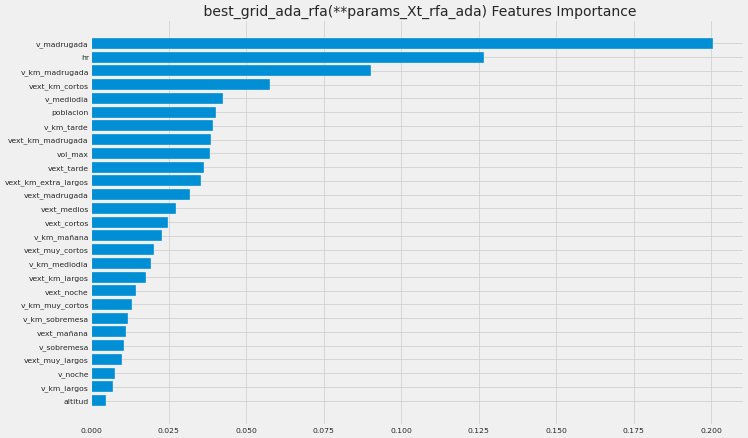

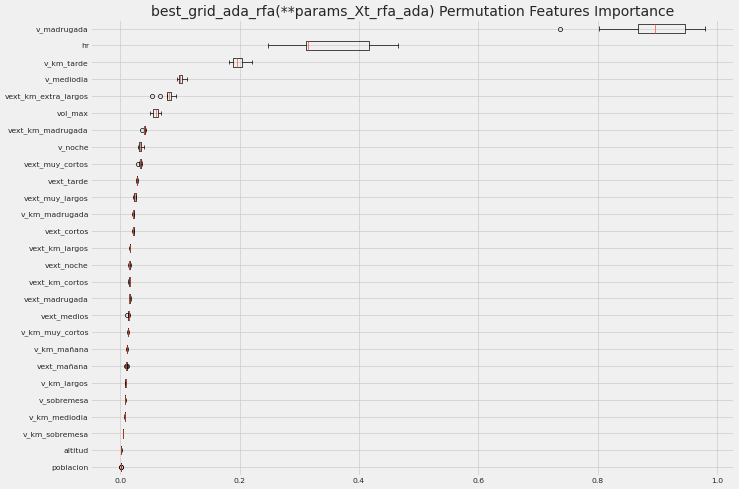

In [96]:
#modelo_final = xgb.XGBRegressor(**params_Xt_rfa_ada)
X_train, X_test, y_train, y_test = train_test_split(Xt_rfa_ada,
                                                    labels,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

best_grid_ada_rfa.fit(X_train, y_train)
pred = best_grid_ada_rfa.predict(X_test)

eftEntrenamiento = best_grid_ada_rfa.score(X_train, y_train)
eftPrediccion = best_grid_ada_rfa.score(X_test, y_test)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

print([Xt_rfa_ada.shape[1], eftEntrenamiento, eftPrediccion, rmse, mae])

importancias = pd.DataFrame(
    {'best_grid_ada_rfa(**params_Xt_rfa_ada)': best_grid_ada_rfa.feature_importances_})
pos = np.arange(
    np.argsort(
        importancias['best_grid_ada_rfa(**params_Xt_rfa_ada)']).shape[0]) + .5
sorted_imp = importancias['best_grid_ada_rfa(**params_Xt_rfa_ada)'].argsort()

print("Dimension :", Xt_rfa_ada.shape[1])
print("Cols :", Xt_rfa_ada.columns)
lista = Xt_rfa_ada.columns
atributos_rfa_ada = [lista_variables[int(x)] for x in lista]

fig = plt.figure(figsize=(15, 10))
#plt.subplot(1, 2, 1)
#plt.barh(pos, importancias['best_grid_ada_rfa'][np.argsort(importancias['best_grid_ada_rfa'])], align='center')
plt.barh(pos,
         importancias['best_grid_ada_rfa(**params_Xt_rfa_ada)'][sorted_imp],
         align='center')

plt.yticks((pos), np.array(atributos_rfa_ada)[sorted_imp])
#np.array(features)[np.argsort(importancias['best_grid_ada_rfa'])])
plt.title(
    ' best_grid_ada_rfa(**params_Xt_rfa_ada) Features Importance')
plt.show()

perm_imp = permutation_importance(best_grid_ada_rfa,
                                  X_test,
                                  y_test,
                                  n_repeats=10,
                                  random_state=RANDOM_STATE,
                                  n_jobs=2)
sorted_idx = perm_imp.importances_mean.argsort()
fig = plt.figure(figsize=(15, 10))

plt.boxplot(perm_imp.importances[sorted_idx].T,
            vert=False,
            labels=np.array(atributos_rfa_ada)[sorted_idx])
plt.title(
    "best_grid_ada_rfa(**params_Xt_rfa_ada) Permutation Features Importance"
)
fig.tight_layout()
plt.show()

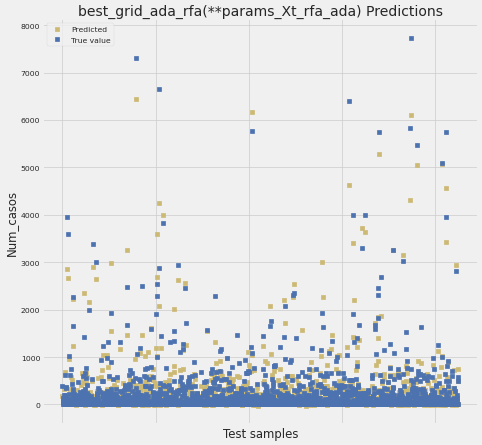

In [97]:
lista = [i for i in range(0,y_test.values.shape[0])]
xx = np.stack(lista)
plt.figure(figsize=(10,10))
plt.plot(xx, pred, "ys" ,label="Predicted")
plt.plot(xx, y_test, "bs" ,label="True value")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("Num_casos")
plt.xlabel("Test samples")
plt.legend(loc="best")
plt.title("best_grid_ada_rfa(**params_Xt_rfa_ada) Predictions")
plt.show()

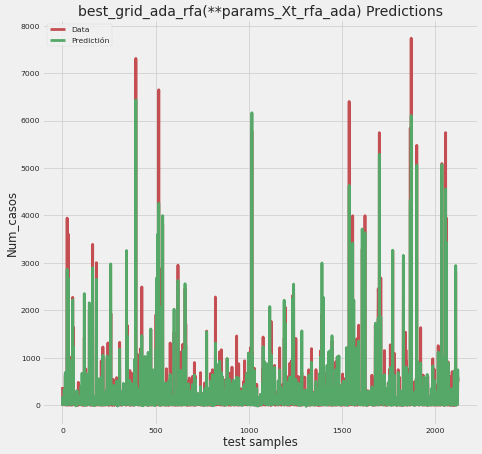

In [98]:
plt.figure(figsize=(10,10))
plt.plot(xx, y_test, c='r', label='Data')
#plt.plot(xx, y, c='k', label='data')
plt.ylabel("Num_casos")
plt.xlabel("test samples")
plt.plot(xx, pred, c='g', label='Predictión')
plt.axis('tight')
plt.legend()
plt.title("best_grid_ada_rfa(**params_Xt_rfa_ada) Predictions" )

plt.show()

In [108]:
#best_grid_ada_rfa.get_params()

## Features  Interpretation 

Explainability :SHAP (SHapley Additive exPlanations)to understand what input features drive the prediction result.

In [101]:
import shap
shap.initjs()

In [155]:
print("Dimension :", Xt_rfa_ada.shape)
print("Cols :", Xt_rfa_ada.columns)
lista = Xt_rfa_ada.columns
atributos_rfa_ada =[lista_variables[int(x)] for x in lista]
atributos_rfa_ada

Dimension : (7077, 27)
Cols : Index(['4', '5', '7', '8', '10', '13', '15', '16', '17', '18', '19', '20',
       '21', '22', '24', '26', '27', '28', '31', '33', '35', '37', '39', '48',
       '59', '61', '65'],
      dtype='object')


['v_noche',
 'v_madrugada',
 'v_mediodia',
 'v_sobremesa',
 'v_km_muy_cortos',
 'v_km_largos',
 'v_km_madrugada',
 'v_km_mañana',
 'v_km_mediodia',
 'v_km_sobremesa',
 'v_km_tarde',
 'vext_muy_cortos',
 'vext_cortos',
 'vext_medios',
 'vext_muy_largos',
 'vext_noche',
 'vext_madrugada',
 'vext_mañana',
 'vext_tarde',
 'vext_km_cortos',
 'vext_km_largos',
 'vext_km_extra_largos',
 'vext_km_madrugada',
 'altitud',
 'hr',
 'vol_max',
 'poblacion']

In [156]:
X_rfa_ada = pd.DataFrame(data=Xt_rfa_ada.values, columns = atributos_rfa_ada)

[27, 0.9999035147496178, 0.8847680642003709, 200.02860337837365, 83.529797833462]
Dimension : 27
Cols : Index(['4', '5', '7', '8', '10', '13', '15', '16', '17', '18', '19', '20',
       '21', '22', '24', '26', '27', '28', '31', '33', '35', '37', '39', '48',
       '59', '61', '65'],
      dtype='object')


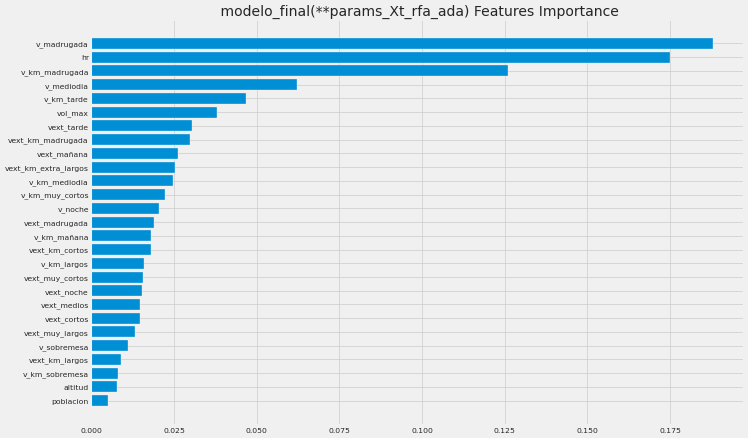

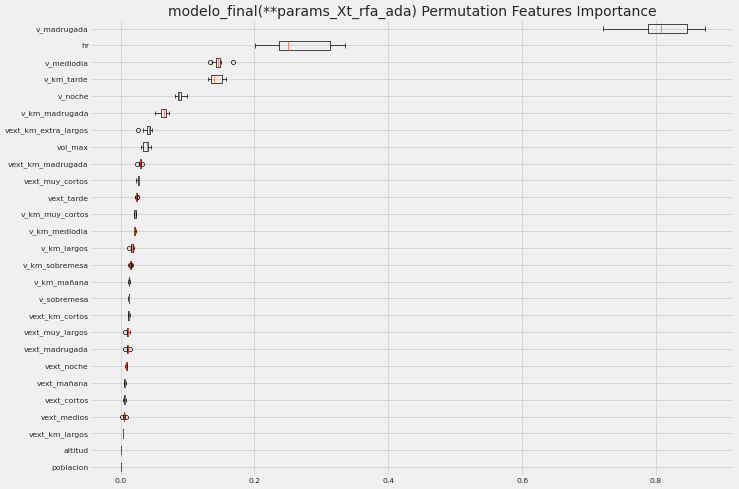

In [157]:
modelo_final = xgb.XGBRegressor(**params_Xt_rfa_ada)
X_train, X_test, y_train, y_test = train_test_split(X_rfa_ada,
                                                    labels,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

modelo_final.fit(X_train, y_train)
pred = modelo_final.predict(X_test)

eftEntrenamiento = modelo_final.score(X_train, y_train)
eftPrediccion = modelo_final.score(X_test, y_test)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

print([X_rfa_ada.shape[1], eftEntrenamiento, eftPrediccion, rmse, mae])

importancias = pd.DataFrame(
    {'modelo_final(**params_Xt_rfa_ada)': modelo_final.feature_importances_})
pos = np.arange(
    np.argsort(
        importancias['modelo_final(**params_Xt_rfa_ada)']).shape[0]) + .5
sorted_imp = importancias['modelo_final(**params_Xt_rfa_ada)'].argsort()

print("Dimension :", Xt_rfa_ada.shape[1])
print("Cols :", Xt_rfa_ada.columns)
lista = Xt_rfa_ada.columns
atributos_rfa_ada = [lista_variables[int(x)] for x in lista]

fig = plt.figure(figsize=(15, 10))
#plt.subplot(1, 2, 1)
#plt.barh(pos, importancias['best_grid_ada_rfa'][np.argsort(importancias['best_grid_ada_rfa'])], align='center')
plt.barh(pos,
         importancias['modelo_final(**params_Xt_rfa_ada)'][sorted_imp],
         align='center')

plt.yticks((pos), np.array(atributos_rfa_ada)[sorted_imp])
#np.array(features)[np.argsort(importancias['best_grid_ada_rfa'])])
plt.title(
    ' modelo_final(**params_Xt_rfa_ada) Features Importance')
plt.show()

perm_imp = permutation_importance(modelo_final,
                                  X_test,
                                  y_test,
                                  n_repeats=10,
                                  random_state=RANDOM_STATE,
                                  n_jobs=2)
sorted_idx = perm_imp.importances_mean.argsort()
fig = plt.figure(figsize=(15, 10))

plt.boxplot(perm_imp.importances[sorted_idx].T,
            vert=False,
            labels=np.array(atributos_rfa_ada)[sorted_idx])
plt.title(
    "modelo_final(**params_Xt_rfa_ada) Permutation Features Importance"
)
fig.tight_layout()
plt.show();

In [212]:
shap_values = shap.TreeExplainer(modelo_final).shap_values(X_test)
#explainer = shap.TreeExplainer(modelo_final, X_test).shap_values(X_test)
#shap_values = explainer(X_test)
shap_interaction_values = shap.TreeExplainer(modelo_final).shap_interaction_values(X_test)

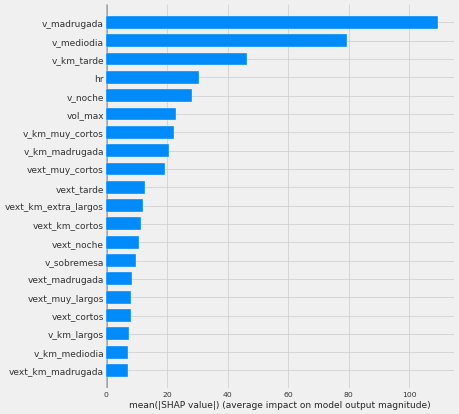

In [213]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [214]:
#shap.plots.bar(shap_values)

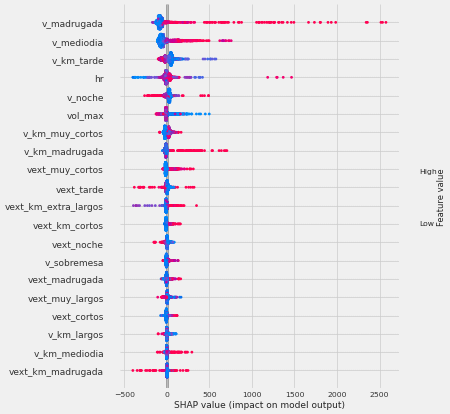

In [215]:
shap.summary_plot(shap_values, X_test)

In [216]:
# shap.summary_plot(shap_values[:2000,:], X_test.iloc[:2000,:])

**Diferente? **

In [225]:
explainer = shap.TreeExplainer(modelo_final, X_test)
shap_values = explainer(X_test)

100%|===================| 2123/2124 [00:32<00:00]        

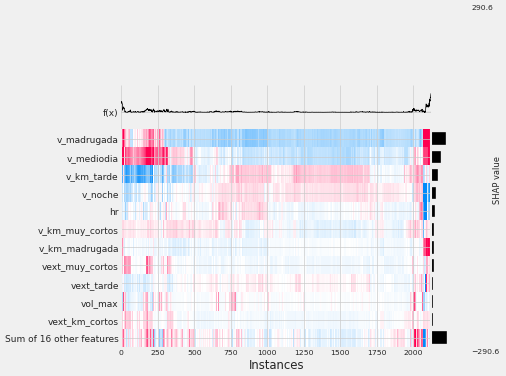

In [226]:
shap.plots.heatmap(shap_values, max_display=12)

28it [00:10, 10.43s/it]                                                                                                     


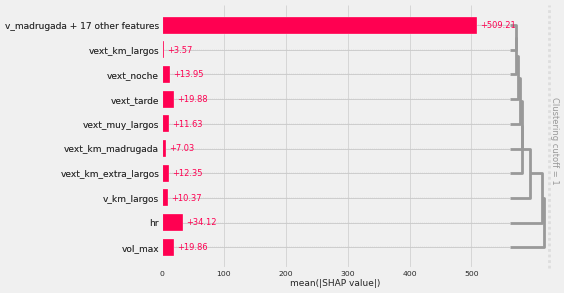

In [227]:
clust = shap.utils.hclust(Xt_rfa_ada, labels, linkage="single")
shap.plots.bar(shap_values, clustering=clust, clustering_cutoff=1)

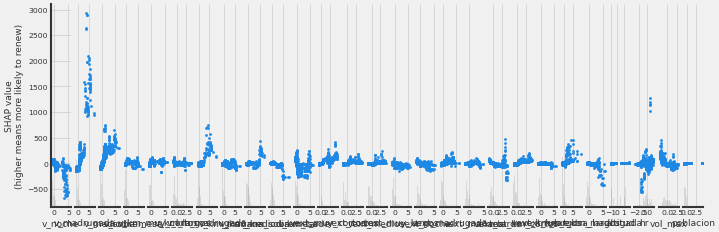

In [228]:
shap.plots.scatter(shap_values, dot_size=2, x_jitter=0.5, color=shap_values,
ylabel="SHAP value\n(higher means more likely to renew)")

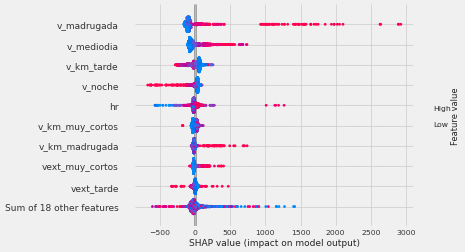

In [229]:
shap.plots.beeswarm(shap_values)

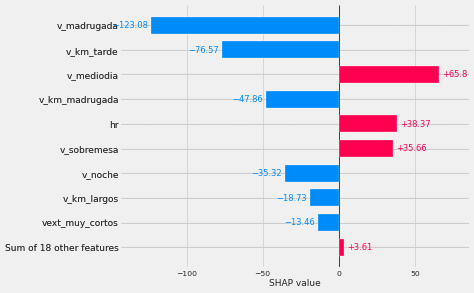

In [230]:
shap.plots.bar(shap_values[23])

In [ ]:
shap.dependence_plot(hr, shap_values, X_test)

In [ ]:
print(" %.2f seconds for  hiperparameter settings."  % ((time.time() - clock_0)))

## Provincias

In [ ]:
clock_1 = time.time()

In [ ]:
def clima_provincia(row): # transfoma la provincia a mayusculas para unificar con otros ficheros
    if row.provincia in ['LA_CORUÑA', 'LUGO','ORENSE', 'PONTEVEDRA', 'HUELVA' ] :
        return "Atlantico"
    elif row.provincia in ['VALENCIA','ALICANTE','ALMERIA', 'CADIZ','GRANADA', 'MALAGA' ] :
        return "Mediterraneo"
    else:
        return "Continental"

In [ ]:
clima = tarjeta.apply(lambda row: clima_provincia(row), axis=1) 
tarjeta.insert(32,'clima', clima)# evolucion.head()

atlantico = tarjeta[tarjeta.clima == "Atlantico"].copy()
mediterraneo = tarjeta[tarjeta.clima == "Mediterraneo"].copy()
continental = tarjeta[tarjeta.clima == "Continental"].copy()

atlantico= atlantico.select_dtypes(exclude=['object'])
mediterraneo= mediterraneo.select_dtypes(exclude=['object'])
continental= continental.select_dtypes(exclude=['object'])

In [ ]:
X_atlantico = atlantico.drop(columns=['num_casos']).select_dtypes(exclude=['object'])
Y_atlantico = atlantico[['num_casos']]
features_a = X_atlantico.columns
labels_a = Y_atlantico.num_casos

X_norm_a = scaler.fit_transform(X_atlantico)

In [ ]:
X_mediterraneo = mediterraneo.drop(columns=['num_casos']).select_dtypes(exclude=['object'])
Y_mediterraneo = mediterraneo[['num_casos']]
features_m = X_mediterraneo.columns
labels_m = Y_mediterraneo.num_casos
    
X_norm_m = scaler.fit_transform(X_mediterraneo)

In [ ]:
X_continental = continental.drop(columns=['num_casos']).select_dtypes(exclude=['object'])
Y_continental = continental[['num_casos']]
features_c = X_continental.columns
labels_c = Y_continental.num_casos
    
X_norm_c = scaler.fit_transform(X_continental)

In [ ]:
def skb_regional(X_norm, labels, zona) :
    
    select = SelectKBest(score_func = mutual_info_regression, k='all')

    X_best_mi = select.fit_transform(X_norm, labels.num_casos) 
    
    X_train, X_test, y_train, y_test = train_test_split(X_best_mi, labels.num_casos, test_size = TEST_SIZE, random_state = RANDOM_STATE)
       
    gxb = GridSearchCV(xgb.XGBRegressor(random_state=RANDOM_STATE ), *param_grid, cv=kfcv,  
                       scoring = 'neg_mean_absolute_error',
                        verbose=1, refit = "mae", return_train_score=True, n_jobs=multiprocessing.cpu_count() // 2)
    
    gxb.fit(X_train, y_train)

    results = gxb.cv_results_
    print("best_score_ : ",gxb.best_score_)
    print("best_params_ : ",gxb.best_params_)
    # el mejor modelo
    mejor_modelo = gxb.best_estimator_

    # Entrenamiento del mejor modelo obtenido
    mejor_modelo.fit(X_train, y_train) 

    # nueva predicción 
    prediction = mejor_modelo.predict(X_test)
 
    eftEntrenamiento = mejor_modelo.score(X_train, y_train)
    eftPrediccion = mejor_modelo.score(X_test, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))

    mae = mean_absolute_error(y_test, prediction)
    
    media_casos_reales = np.mean(y_test)
    porcentaje = mae *100  / media_casos_reales
    print("MAE : ",mae, "porcentaje :", porcentaje, "tamaño :", X_best_mi.shape[1])

    return (['SKB-GridSearchCV', zona,'%.3f'%(porcentaje),'%.3f'%(X_best_mi.shape[1]), '%.3f'%(media_casos_reales), '%.3f'%(eftPrediccion),
             '%.3f'%(rmse), '%.3f'%(mae)])


In [ ]:
def dcf_regional(X_norm, labels, zona) :
    
    trh_dcf = DropCorrelatedFeatures(variables=None, method='spearman', threshold=0.957692) 

    X_t  = trh_dcf.fit_transform(X_norm, labels.num_casos)
    
    X_train, X_test, y_train, y_test = train_test_split(X_t , labels.num_casos, test_size = TEST_SIZE, random_state = RANDOM_STATE)
        
    gxb = GridSearchCV(xgb.XGBRegressor(random_state=RANDOM_STATE ), *param_grid, cv=kfcv,
                       scoring = 'neg_mean_absolute_error',
                        verbose=1, refit = "mae", return_train_score=True, n_jobs=multiprocessing.cpu_count() // 2)
    
    gxb.fit(X_train, y_train)

    results = gxb.cv_results_
    print("best_score_ : ",gxb.best_score_)
    print("best_params_ : ",gxb.best_params_)
    # el mejor modelo
    mejor_modelo = gxb.best_estimator_

    # Entrenamiento del mejor modelo obtenido
    mejor_modelo.fit(X_train, y_train) 

    # nueva predicción 
    prediction = mejor_modelo.predict(X_test)
 
    eftEntrenamiento = mejor_modelo.score(X_train, y_train)
    eftPrediccion = mejor_modelo.score(X_test, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))

    mae = mean_absolute_error(y_test, prediction)
    
    media_casos_reales = np.mean(y_test)
    porcentaje = mae *100  / media_casos_reales
    print("MAE : ",mae, "porcentaje :", porcentaje, "tamaño :", X_t.shape[1])

    return (['DCF-GridSearchCV', zona, '%.3f'%(porcentaje),'%.3f'%(X_t.shape[1]), '%.3f'%(media_casos_reales), '%.3f'%(eftPrediccion),
             '%.3f'%(rmse), '%.3f'%(mae)])


In [ ]:
def rfa_regional(X_norm, labels, zona) :
    
    trrec_ad = RecursiveFeatureAddition(estimator=xgb.XGBRegressor(random_state=RANDOM_STATE),  scoring="neg_mean_absolute_error", cv=kfcv)

    Xt_trrec_ad = trrec_ad.fit_transform(X_norm, labels.num_casos)
    
    X_train, X_test, y_train, y_test = train_test_split(Xt_trrec_ad, labels.num_casos, test_size = TEST_SIZE, random_state = RANDOM_STATE)

    gxb = GridSearchCV(xgb.XGBRegressor(random_state=RANDOM_STATE ), *param_grid, cv=kfcv,
                       scoring = 'neg_mean_absolute_error',
                       verbose=1, refit = "mae", return_train_score=True, n_jobs=multiprocessing.cpu_count() // 2)
   
    gxb.fit(X_train, y_train)

    results = gxb.cv_results_
    print("best_score_ : ",gxb.best_score_)
    print("best_params_ : ",gxb.best_params_)
    # el mejor modelo
    mejor_modelo = gxb.best_estimator_

    # Entrenamiento del mejor modelo obtenido
    mejor_modelo.fit(X_train, y_train) 

    # nueva predicción 
    prediction = mejor_modelo.predict(X_test)
 
    eftEntrenamiento = mejor_modelo.score(X_train, y_train)
    eftPrediccion = mejor_modelo.score(X_test, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))

    mae = mean_absolute_error(y_test, prediction)
    
    media_casos_reales = np.mean(y_test)
    porcentaje = mae *100  / media_casos_reales
    print("MAE : ",mae, "porcentaje :", porcentaje, "tamaño :", Xt_trrec_ad.shape[1])

    return (['RFA-GridSearchCV', zona, '%.3f'%(porcentaje),'%.3f'%(Xt_trrec_ad.shape[1]), '%.3f'%(media_casos_reales), '%.3f'%(eftPrediccion),
             '%.3f'%(rmse), '%.3f'%(mae)])


In [ ]:
def rfe_regional(X_norm, labels, zona) :
    
    trrec = RecursiveFeatureElimination(estimator=xgb.XGBRegressor(random_state=RANDOM_STATE), scoring="neg_mean_absolute_error", cv=kfcv)

    Xt_rfe = trrec.fit_transform(X_norm, labels.num_casos)
    
    X_train, X_test, y_train, y_test = train_test_split(Xt_rfe, labels.num_casos, test_size = TEST_SIZE, random_state = RANDOM_STATE)

    gxb = GridSearchCV(xgb.XGBRegressor(random_state=RANDOM_STATE ), *param_grid, cv=kfcv,
                       scoring = 'neg_mean_absolute_error',
                       verbose=1, refit = "mae", return_train_score=True, n_jobs=multiprocessing.cpu_count() // 2)
   
    gxb.fit(X_train, y_train)

    results = gxb.cv_results_
    print("best_score_ : ",gxb.best_score_)
    print("best_params_ : ",gxb.best_params_)
    # el mejor modelo
    mejor_modelo = gxb.best_estimator_

    # Entrenamiento del mejor modelo obtenido
    mejor_modelo.fit(X_train, y_train) 

    # nueva predicción 
    prediction = mejor_modelo.predict(X_test)
 
    eftEntrenamiento = mejor_modelo.score(X_train, y_train)
    eftPrediccion = mejor_modelo.score(X_test, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))

    mae = mean_absolute_error(y_test, prediction)
    
    media_casos_reales = np.mean(y_test)
    porcentaje = mae *100  / media_casos_reales
    print("MAE : ",mae, "porcentaje :", porcentaje, "tamaño :", Xt_rfe.shape[1])

    return (['RFE-GridSearchCV', zona, '%.3f'%(porcentaje),'%.3f'%(Xt_rfe.shape[1]), '%.3f'%(media_casos_reales), '%.3f'%(eftPrediccion),
             '%.3f'%(rmse), '%.3f'%(mae)])


### Climas

In [ ]:
modelado_reg = []

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm_a, labels_a, test_size = TEST_SIZE, random_state = RANDOM_STATE)

best_grid_ada_rfa.fit(X_train,y_train)
pred = best_grid_ada_rfa.predict(X_test)
    
eftEntrenamiento = best_grid_ada_rfa.score (X_train, y_train)
eftPrediccion = best_grid_ada_rfa.score (X_test, y_test)  
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

media_casos_reales = np.mean(y_test)
porcentaje = mae *100  / media_casos_reales

modelado_reg.append(['best_grid_ada_rfa', "Atlantico", '%.3f'%(porcentaje),'%.3f'%(X_continental.shape[1]), 
                     '%.3f'%(media_casos_reales), '%.3f'%(eftPrediccion),
                     '%.3f'%(rmse), '%.3f'%(mae)])


print([X_norm_a.shape[1], eftEntrenamiento, eftPrediccion, rmse, mae])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm_m, labels_m, test_size = TEST_SIZE, random_state = RANDOM_STATE)

best_grid_ada_rfa.fit(X_train,y_train)
pred = best_grid_ada_rfa.predict(X_test)
    
eftEntrenamiento = best_grid_ada_rfa.score (X_train, y_train)
eftPrediccion = best_grid_ada_rfa.score (X_test, y_test)  
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

media_casos_reales = np.mean(y_test)
porcentaje = mae *100  / media_casos_reales

modelado_reg.append(['best_grid_ada_rfa', "Mediterraneo", '%.3f'%(porcentaje),'%.3f'%(X_continental.shape[1]), 
                     '%.3f'%(media_casos_reales), '%.3f'%(eftPrediccion),
                     '%.3f'%(rmse), '%.3f'%(mae)])

print([X_norm_m.shape[1], eftEntrenamiento, eftPrediccion, rmse, mae])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm_c, labels_c, test_size = TEST_SIZE, random_state = RANDOM_STATE)

best_grid_ada_rfa.fit(X_train,y_train)
pred = best_grid_ada_rfa.predict(X_test)
    
eftEntrenamiento = best_grid_ada_rfa.score (X_train, y_train)
eftPrediccion = best_grid_ada_rfa.score (X_test, y_test)  
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

media_casos_reales = np.mean(y_test)
porcentaje = mae *100  / media_casos_reales

modelado_reg.append(['best_grid_ada_rfa', "Continental", '%.3f'%(porcentaje),'%.3f'%(X_continental.shape[1]), 
                     '%.3f'%(media_casos_reales), '%.3f'%(eftPrediccion),
                     '%.3f'%(rmse), '%.3f'%(mae)])

print([X_norm_c.shape[1], eftEntrenamiento, eftPrediccion, rmse, mae])

In [ ]:
modelado_reg.append(dcf_regional(X_atlantico, Y_atlantico, 'Atlantico'))
modelado_reg.append(rfa_regional(X_atlantico, Y_atlantico, 'Atlantico'))
modelado_reg.append(skb_regional(X_atlantico, Y_atlantico, 'Atlantico'))
modelado_reg.append(rfe_regional(X_atlantico, Y_atlantico, 'Atlantico'))

modelado_reg.append(dcf_regional(X_mediterraneo, Y_mediterraneo, 'Mediterraneo'))
modelado_reg.append(rfa_regional(X_mediterraneo, Y_mediterraneo, 'Mediterraneo'))
modelado_reg.append(skb_regional(X_mediterraneo, Y_mediterraneo, 'Mediterraneo'))
modelado_reg.append(rfe_regional(X_mediterraneo, Y_mediterraneo, 'Mediterraneo'))

modelado_reg.append(dcf_regional(X_continental, Y_continental, 'Continental'))
modelado_reg.append(rfa_regional(X_continental, Y_continental, 'Continental'))
modelado_reg.append(skb_regional(X_continental, Y_continental, 'Continental'))
modelado_reg.append(rfe_regional(X_continental, Y_continental, 'Continental'))

### Provincias

In [ ]:
for prov in tarjeta.provincia.unique().tolist():
    
    X_provs = tarjeta[tarjeta.provincia == prov].drop(columns=['num_casos']).select_dtypes(exclude=['object'])
    label_provs =tarjeta[tarjeta.provincia == prov][['num_casos']]
    X_train, X_test, y_train, y_test = train_test_split(X_provs, label_provs.num_casos, test_size = TEST_SIZE, random_state = RANDOM_STATE)
    
    best_grid_ada_rfa.fit(X_train,y_train)
    pred = best_grid_ada_rfa.predict(X_test)
    
    eftEntrenamiento = best_grid_ada_rfa.score (X_train, y_train)
    eftPrediccion = best_grid_ada_rfa.score (X_test, y_test)  
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))

    media_casos_reales = np.mean(y_test)
    porcentaje = mae * 100 / media_casos_reales

    modelado_reg.append(['best_grid_ada_rfa', prov, '%.3f'%(porcentaje),'%.3f'%(X_continental.shape[1]),
                         '%.3f'%(media_casos_reales), '%.3f'%(eftPrediccion), '%.3f'%(rmse), '%.3f'%(mae)])


In [ ]:
for prov in tarjeta.provincia.unique().tolist():
    X_provs = tarjeta[tarjeta.provincia == prov].drop(columns=['num_casos']).select_dtypes(exclude=['object'])
    label_provs =tarjeta[tarjeta.provincia == prov][['num_casos']]
    print ("Provincia : ", prov)
    modelado_reg.append(dcf_regional(X_provs, label_provs, prov ))
    modelado_reg.append(rfa_regional(X_provs, label_provs, prov ))
    modelado_reg.append(skb_regional(X_provs, label_provs, prov ))
    modelado_reg.append(rfe_regional(X_provs, label_provs, prov ))

    print ("-- --"*5)

## Resultados Climas y provincias

In [ ]:
modelado_reg

In [ ]:
metricas_modelos = pd.DataFrame(modelado_reg,
                                columns=['Método', 'Modelo', 'Prcnt', "#Feats", 'media_casos_reales', 'ScoreTest', 'RMSE',  'MAE'])
nombre = 'datos_regionales_hiperparametros_0.csv'

metricas_modelos.to_csv("~/Trabajo_tfm/datos_csv/modelos_" + nombre )

In [ ]:
metricas_modelos[:50]

In [ ]:
metricas_modelos[50:]

In [ ]:
print(" %.2f seconds for  provinces hiperparameter settings."  % ((time.time() - clock_1)))

In [ ]:
print(" %.2f seconds for  hiperparameter settings."  % ((time.time() - clock_0)))

In [ ]:
valores = metricas_modelos['MAE'].values
lista_variables = list(features)
lista = modelo_final.get_support()
[lista_variables[x] for x in lista]

pos = np.arange(np.argsort(metricas_modelos['MAE']).shape[0]) + .5
fig = plt.figure(figsize=(15,10))
#plt.subplot(1, 2, 1)
plt.barh(pos, metricas_modelos['MAE'][np.argsort(metricas_modelos['MAE'])], align='center')
plt.yticks(pos, np.array(features)[np.argsort(metricas_modelos['MAE'])])
plt.title('Importancia de los atributos para best_grid_ada_rfe')
plt.show()

In [ ]:

pos = np.arange(np.argsort(metricas_modelos['MAE']).shape[0]) + .5
fig = plt.figure(figsize=(15,10))
plt.barh(pos, metricas_modelos['MAE'][np.argsort(metricas_modelos['MAE'])], align='center')
plt.yticks(pos, np.array(features)[np.argsort(metricas_modelos['MAE'])])
plt.title('Valores de mae para climas y provincias')
plt.show()

